In [1]:
import numpy as np
import h5py
import pandas as pd
from itertools import islice
from collections import Counter
import re
from itertools import islice
from collections import Counter
from io import BytesIO
import matplotlib.pyplot as plt
import scipy
import qnorm 
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
gt=pd.read_csv('great_table2.csv')

In [3]:
dee = pd.read_csv('dee_cross.csv')
exp = pd.read_csv('exp_cross.csv')
dee2=dee.drop(columns = ['ensemble','symbol', 'Unnamed: 0'],axis = 1)
exp2=exp.drop(columns = ['ensemble','symbol', 'Unnamed: 0'],axis = 1)

In [4]:
dee2

,GSM1026888,GSM1026889,GSM1026890,GSM1026891,GSM1026892,GSM1026893,GSM1026894,GSM1026895,GSM1026896,GSM1026897,...,GSM951560,GSM951561,GSM951562,GSM951563,GSM951564,GSM951565,GSM951566,GSM951567,GSM951568,GSM988446
0,1857,1946,1460,1731,2064,1829,1524,1851,1452,1211,...,856,1528,1238,1618,2624,2351,3018,6720,3657,697
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,17,4,27,46,61,43,58,1,7,...,157,252,126,37,281,295,206,146,43,76
3,0,1,1,0,1,4,3,3,1,0,...,4,11,5,3,12,15,9,10,3,102
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30604,18,26,18,22,24,16,11,16,9,16,...,2,4,4,12,2,1,0,10,7,0
30605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30606,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,2,0,1,0


In [5]:
exp2

,GSM1026888,GSM1026889,GSM1026890,GSM1026891,GSM1026892,GSM1026893,GSM1026894,GSM1026895,GSM1026896,GSM1026897,...,GSM951560,GSM951561,GSM951562,GSM951563,GSM951564,GSM951565,GSM951566,GSM951567,GSM951568,GSM988446
0,5567,5857,4467,5325,6059,5579,4753,5581,4557,3708,...,730,1378,1090,1446,2473,2214,2912,6433,3521,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,16,61,12,85,124,172,117,188,7,29,...,147,246,123,33,266,274,196,138,41,0
3,2,6,5,0,3,12,10,16,1,3,...,4,12,4,4,14,17,13,11,5,11
4,2,0,1,1,0,0,2,0,3,1,...,0,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30603,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,2,0,2,1,4
30604,29,10,24,49,61,50,31,69,47,13,...,12,0,0,0,0,14,0,11,17,0
30605,0,0,0,1,0,4,0,0,5,0,...,0,10,4,9,73,62,104,261,147,7
30606,0,0,0,1,0,4,0,0,5,0,...,0,10,4,9,73,62,104,261,147,7


In [8]:
res = stats.spearmanr(dee2['GSM1026888'], exp2['GSM1026888'], axis=0, alternative='two-sided')

In [9]:
res

SpearmanrResult(correlation=0.9177536801863873, pvalue=0.0)

In [10]:
corr=exp2.corrwith(dee2, axis=0, drop=False, method='spearman')
print(corr.head())
print(corr.tail())
print(len(corr))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


GSM1026888    0.917754
GSM1026889    0.918181
GSM1026890    0.918566
GSM1026891    0.920365
GSM1026892    0.923099
dtype: float64
GSM951565    0.926182
GSM951566    0.927722
GSM951567    0.924244
GSM951568    0.926435
GSM988446    0.442259
dtype: float64
5179


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   4.,   1.,
          2.,   0.,   3.,   1.,   1.,   0.,   1.,   5.,   4.,   4.,   6.,
         13.,  17.,  18.,  16.,  36.,  39.,  32.,  41.,  42.,  47.,  42.,
         26.,  29.,  35.,  28.,  26.,  31.,  30.,  46.,  37.,  54.,  79.,
         62., 126., 186., 222., 303., 476., 651., 790., 795., 557., 171.,
         28.]),
 array([0.08263312, 0.09145301, 0.1002729 , 0.10909279, 0.11791268,
        0.12673258, 0.13555247, 0.14437236, 0.15319225, 0.16201214,
        0.17083204, 0.17965193, 0.18847182, 0.19729171, 0.2061116 ,
        0.2149315 , 0.22375139, 0.23257128, 0.24139117, 0.25021106,
        0.25903096, 0.26785085, 0.27667074, 0.

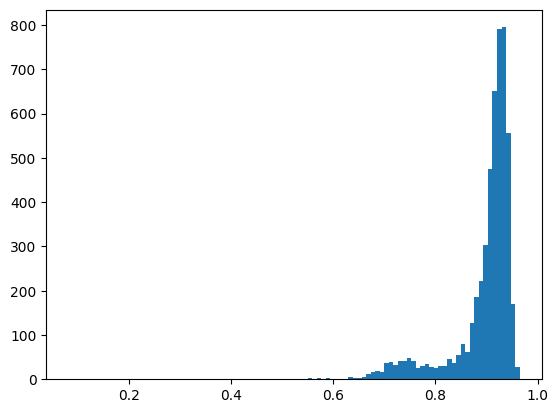

In [11]:
plt.hist(corr, bins=100)

In [12]:
def corr_cell_type(typ):
    typ=gt.loc[gt['Cell_type'] == typ]
    typ_geo=typ['geo_accession'].values.tolist()
    exp_typ=exp2.loc[:, exp2.columns.intersection(typ_geo)]
    dee_typ=dee2.loc[:, dee2.columns.intersection(typ_geo)]
    corr_typ=exp_typ.corrwith(dee_typ, axis=0, drop=False, method='spearman')
    return plt.hist(corr_typ, bins=100)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
          1.,   0.,   2.,   0.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,
          1.,   1.,   5.,   3.,   2.,   2.,   2.,   2.,   2.,   1.,   1.,
          1.,   1.,   0.,   1.,   2.,  10.,  12.,  13.,   9.,   5.,   9.,
         11.,  17.,  30.,  50.,  74.,  83., 102., 181., 133.,  65.,  30.,
          8.]),
 array([0.32140243, 0.32767616, 0.33394988, 0.34022361, 0.34649734,
        0.35277106, 0.35904479, 0.36531851, 0.37159224, 0.37786596,
        0.38413969, 0.39041342, 0.39668714, 0.40296087, 0.40923459,
        0.41550832, 0.42178204, 0.42805577, 0.4343295 , 0.44060322,
        0.44687695, 0.45315067, 0.4594244 , 0.

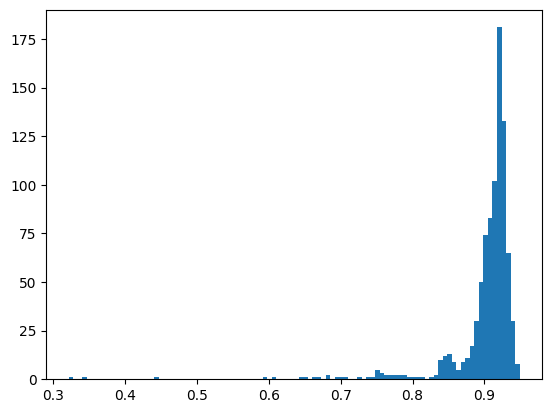

In [13]:
corr_cell_type('B_cells')

(array([ 1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  2.,  1.,
         1.,  4.,  1.,  2.,  3.,  1.,  1.,  1.,  1.,  2.,  1.,  0.,  1.,
         1.,  5.,  4.,  4.,  7.,  6.,  7.,  6.,  3.,  1.,  3.,  4.,  4.,
         4.,  4.,  5.,  3.,  2.,  4.,  7.,  6.,  8.,  6.,  8.,  4.,  1.,
         5.,  5.,  2.,  2.,  7.,  5., 11., 14., 17., 24., 15., 30., 21.,
         9.,  7.,  4.,  8.,  5.,  4.,  1.,  0.,  1.]),
 array([0.73380553, 0.73586743, 0.73792934, 0.73999125, 0.74205315,
        0.74411506, 0.74617697, 0.74823887, 0.75030078, 0.75236268,
        0.75442459, 0.7564865 , 0.7585484 , 0.76061031, 0.76267222,
        0.76473412, 0.76679603, 0.76885794, 0.77091984, 0.77298175,
        0.77504365, 0.77710556, 0.77916747, 0.78122937, 0.78329128,
        0.78535319, 0.78741509, 0.789477  , 0.79153891, 0.79360081,
        0.79566272, 0.7977

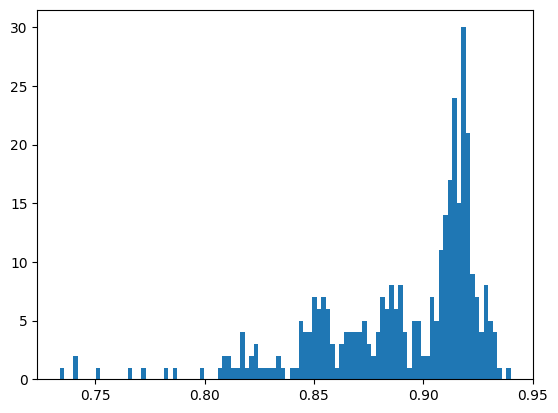

In [14]:
corr_cell_type('T_cells')

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   4.,   1.,
          2.,   0.,   2.,   1.,   0.,   0.,   1.,   5.,   3.,   3.,   6.,
         11.,  15.,  18.,  15.,  35.,  38.,  32.,  39.,  39.,  40.,  39.,
         21.,  26.,  29.,  27.,  24.,  23.,  21.,  39.,  22.,  22.,  35.,
         42.,  97., 143., 157., 204., 307., 387., 544., 687., 532., 168.,
         28.]),
 array([0.08263312, 0.09145301, 0.1002729 , 0.10909279, 0.11791268,
        0.12673258, 0.13555247, 0.14437236, 0.15319225, 0.16201214,
        0.17083204, 0.17965193, 0.18847182, 0.19729171, 0.2061116 ,
        0.2149315 , 0.22375139, 0.23257128, 0.24139117, 0.25021106,
        0.25903096, 0.26785085, 0.27667074, 0.

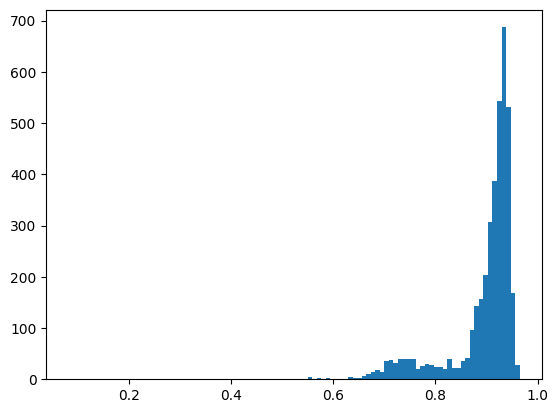

In [15]:
corr_cell_type('macrophage')

In [16]:
def corr_cell_class(cla):
    cl=gt.loc[gt['Classes'] == cla]
    cl_geo=cl['geo_accession'].values.tolist()
    exp_cl=exp2.loc[:, exp2.columns.intersection(cl_geo)]
    dee_cl=dee2.loc[:, dee2.columns.intersection(cl_geo)]
    corr_cl=exp_cl.corrwith(dee_cl, axis=0, drop=False, method='spearman')
    plt.hist(corr_cl, bins=100)
    return print(cla), plt.show()

splenic B cells


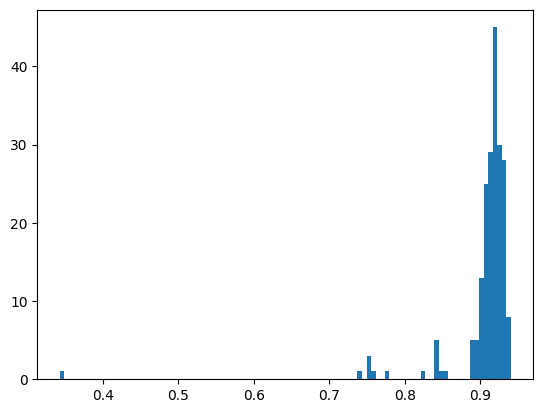

Germinal center B cells


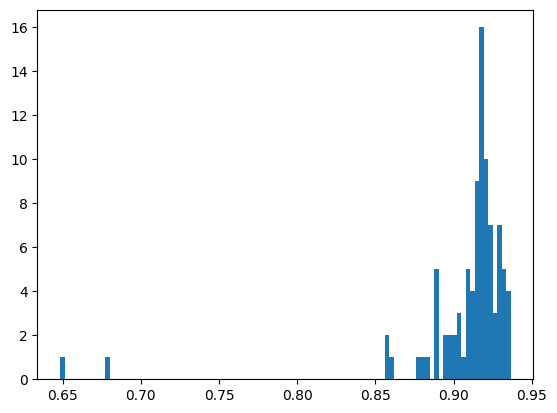

Marginal zone B cells


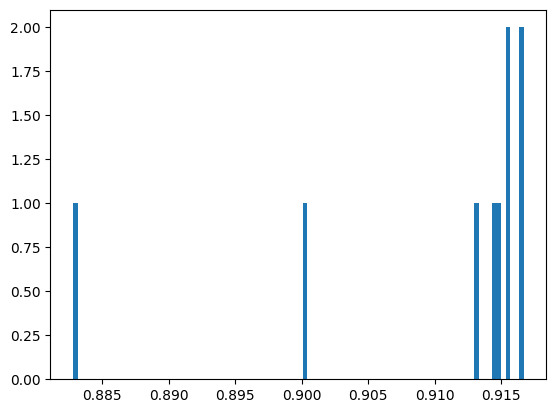

Follicular B cells


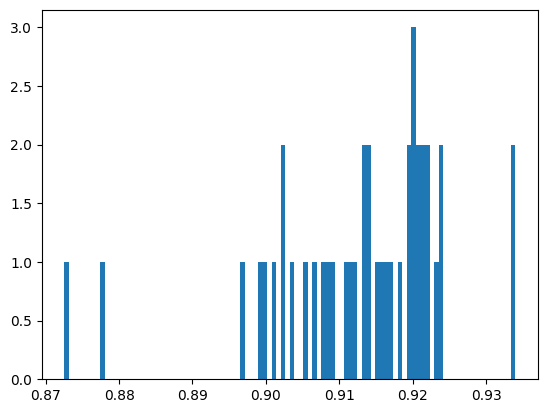

B220+ B cells


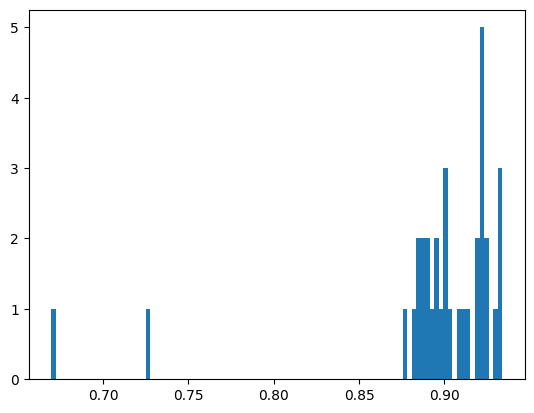

Primary B cells


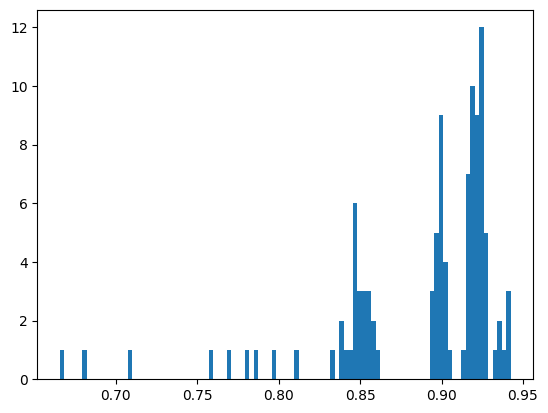

NP+ GC B cells


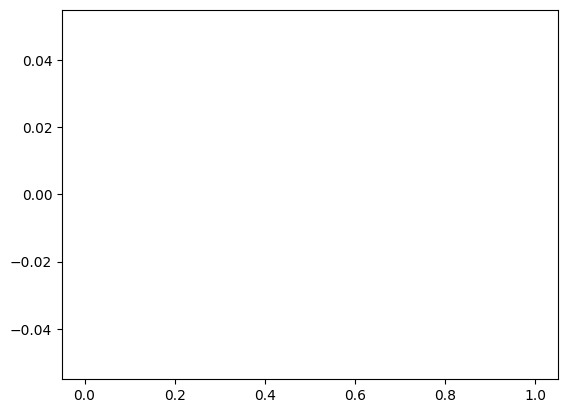

Immature B cells


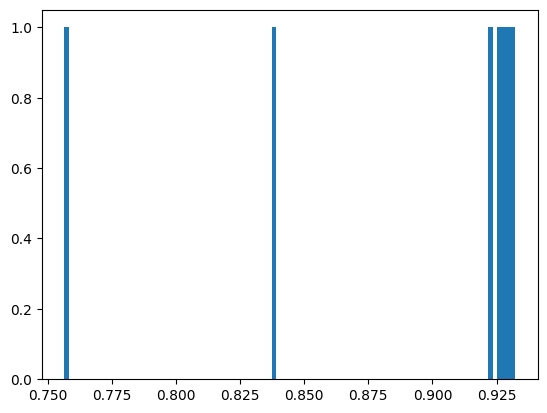

CH12 line


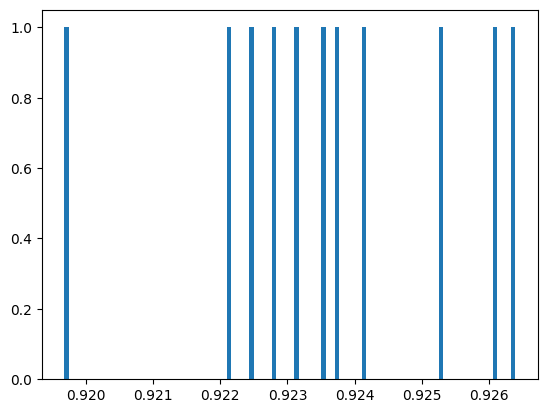

CD19+ B cells


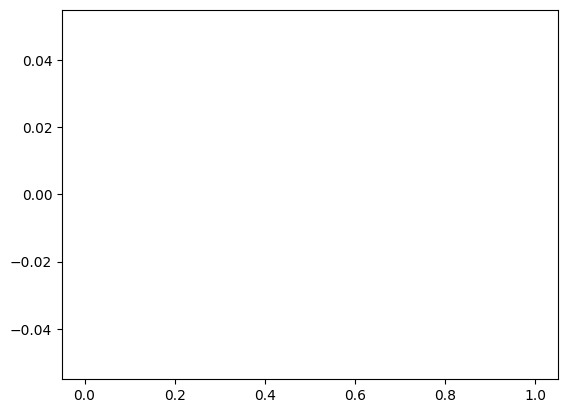

other B-cells


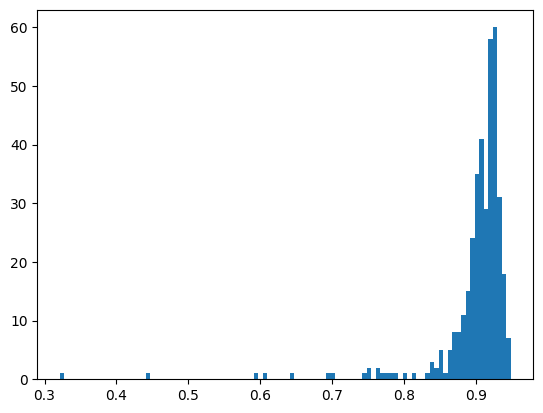

In [17]:
B_classes=['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','NP+ GC B cells','Immature B cells','CH12 line','CD19+ B cells', 'other B-cells']
for i in B_classes:
    corr_cell_class(i)

CD8+ T cells


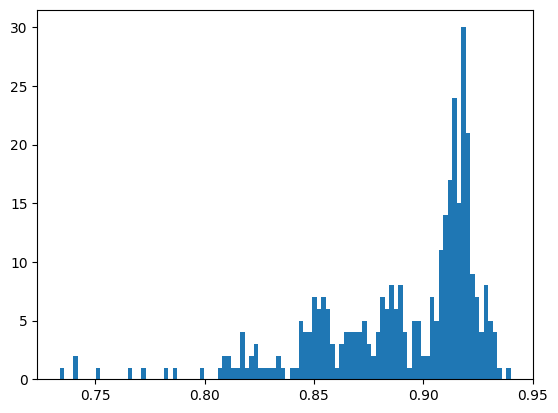

CD4+ T cells


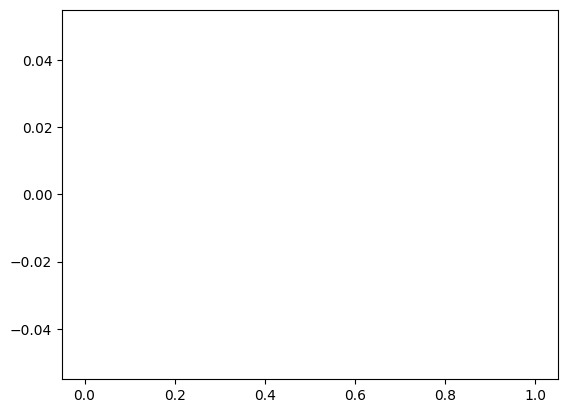

YFP+ T cells


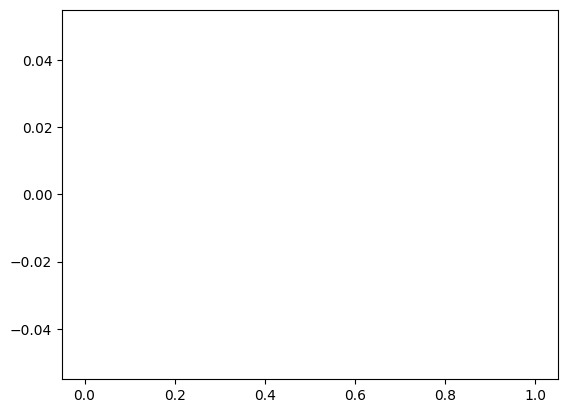

VÎ³4 T cell


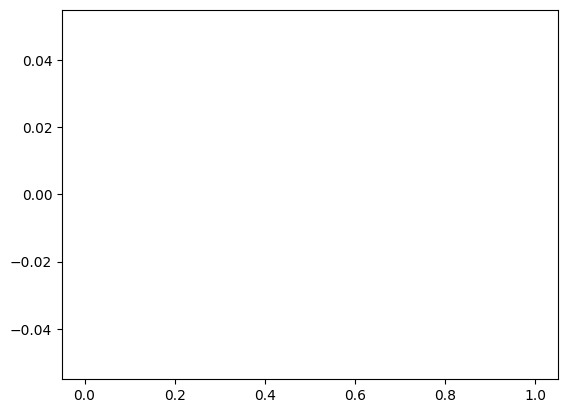

Tumor-infiltrating T cells


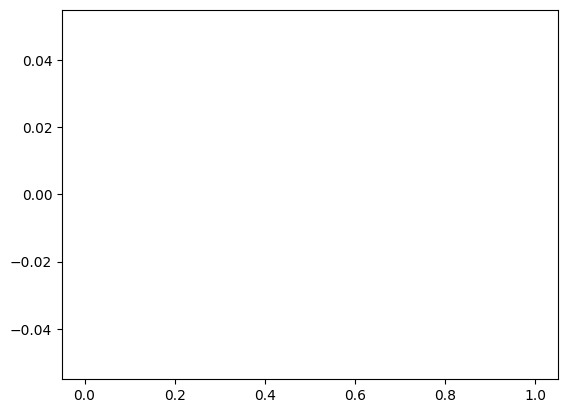

Thymus T cells


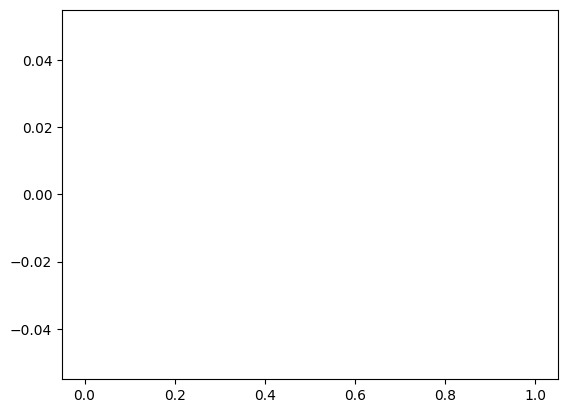

Splenic T cells


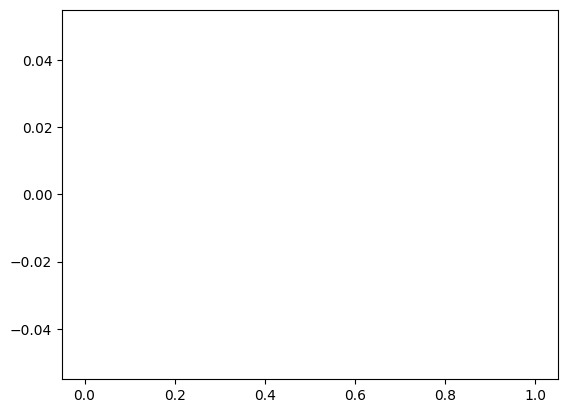

other T cells


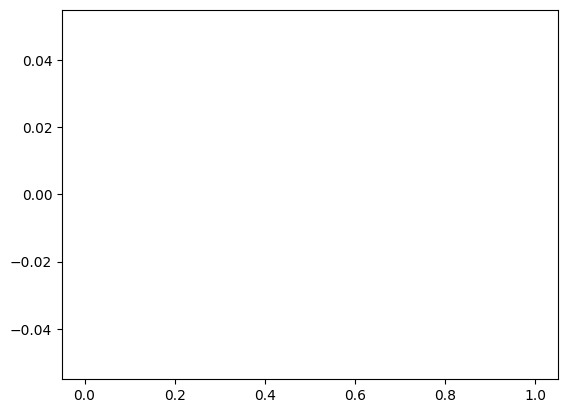

In [18]:
T_classes = ['CD8+ T cells', 'CD4+ T cells', 'YFP+ T cells','V\xce\xb34 T cell', 'Tumor-infiltrating T cells', 'Thymus T cells', 'Splenic T cells', 'other T cells']
for i in T_classes:
    corr_cell_class(i)

Bone Marrow Derived macrophages


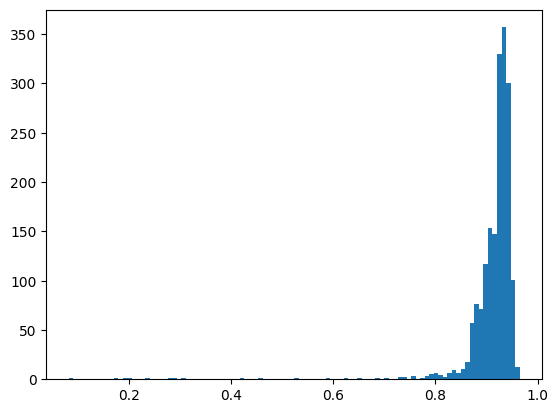

Peritoneal macrophage


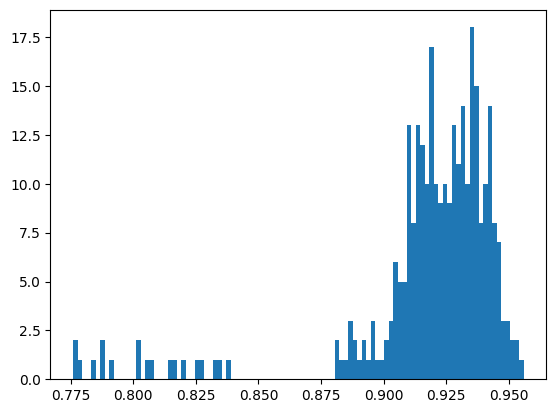

Alveolar macrophage


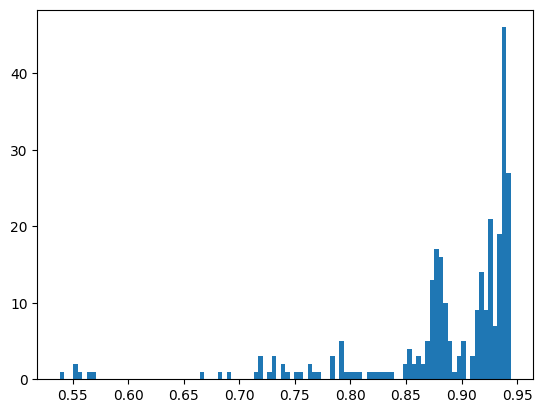

tumor macrophage


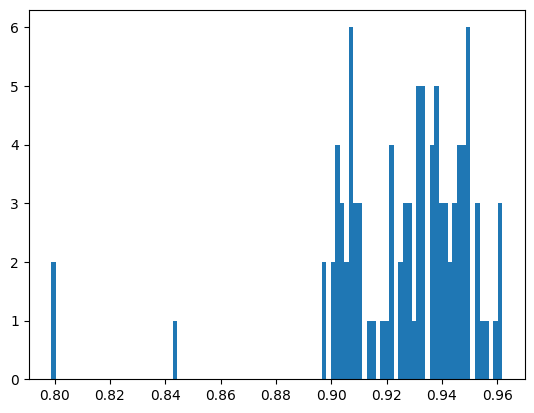

Splenic macrophages


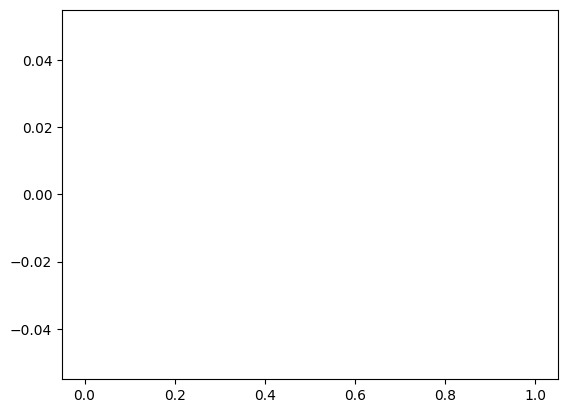

hepatic macrophages


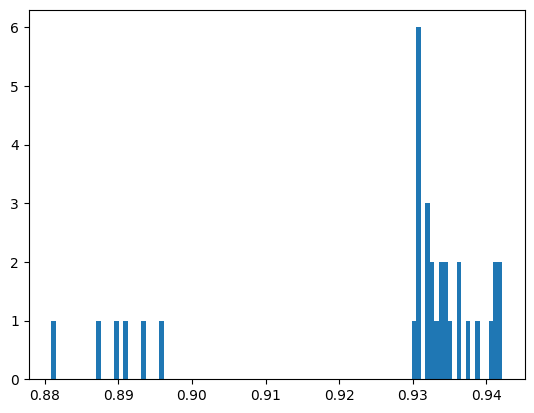

sciatic nerve macrophages


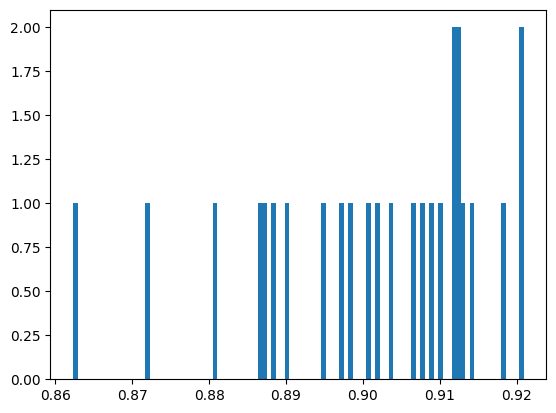

Phagocytic macrophages


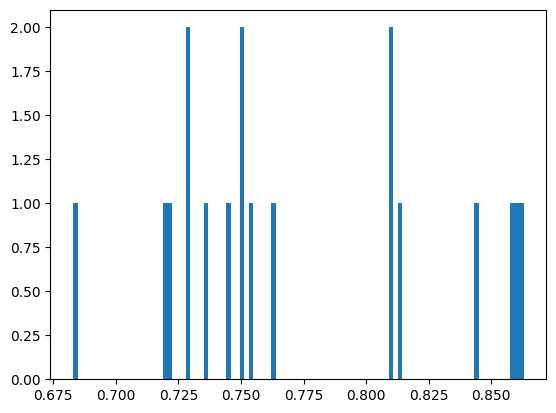

Peripheral macrophages


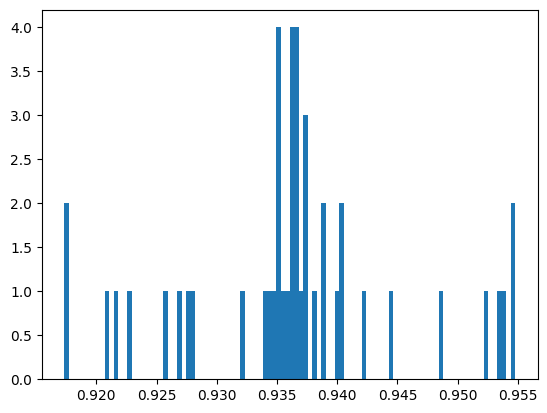

muscle macrophages


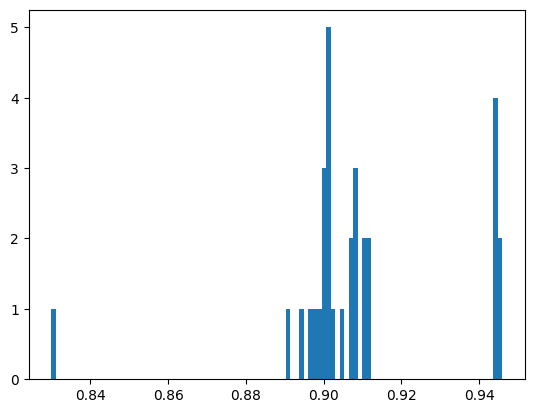

1 day after TBI macrophages


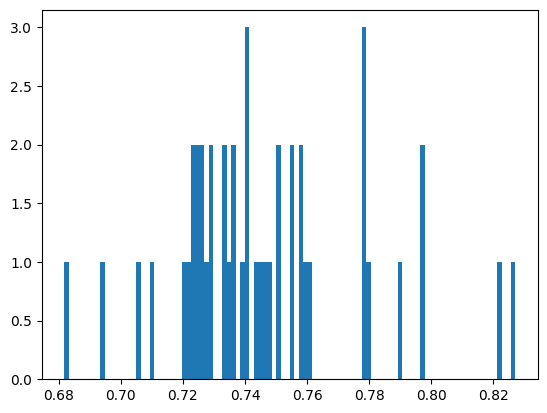

other macrophage


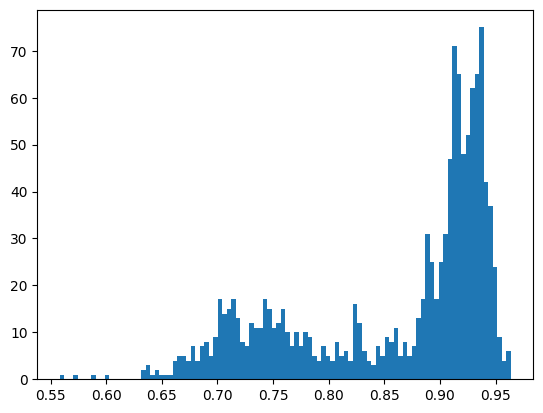

In [19]:
M_classes = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','Splenic macrophages','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
for i in M_classes:
    corr_cell_class(i)

In [20]:
import numpy as np
import h5py
import pandas as pd
from itertools import islice
from collections import Counter
import re
from itertools import islice
from collections import Counter
from io import BytesIO
import matplotlib.pyplot as plt
import scipy

In [21]:
gt=pd.read_csv('great_table2.csv')
dee = pd.read_csv('dee_cross.csv')
exp = pd.read_csv('exp_cross.csv')
dee2=dee.drop(columns = ['ensemble','symbol', 'Unnamed: 0'],axis = 1)
exp2=exp.drop(columns = ['ensemble','symbol', 'Unnamed: 0'],axis = 1)

In [22]:
dee_norm_log=np.log(dee2+1)
exp_norm_log=np.log(exp2+1)
#Chech results of normalization 
print(dee2.head(10))
print(dee_norm_log.head(10))

   GSM1026888  GSM1026889  GSM1026890  GSM1026891  GSM1026892  GSM1026893  \
0        1857        1946        1460        1731        2064        1829   
1           0           0           0           0           0           0   
2           6          17           4          27          46          61   
3           0           1           1           0           1           4   
4           1           0           0           0           0           0   
5         355         286         233         216         276         318   
6         410         373         213         322         401         293   
7        1279         945         988         891         950         862   
8         224         164         173         185         252         240   
9         124         143         153         214         372         270   

   GSM1026894  GSM1026895  GSM1026896  GSM1026897  ...  GSM951560  GSM951561  \
0        1524        1851        1452        1211  ...        856       

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 5.000e+00, 1.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
        4.000e+00, 1.300e+01, 5.000e+00, 8.000e+00, 1.400e+01, 1.000e+01,
        1.200e+01, 1.300e+01, 1.300e+0

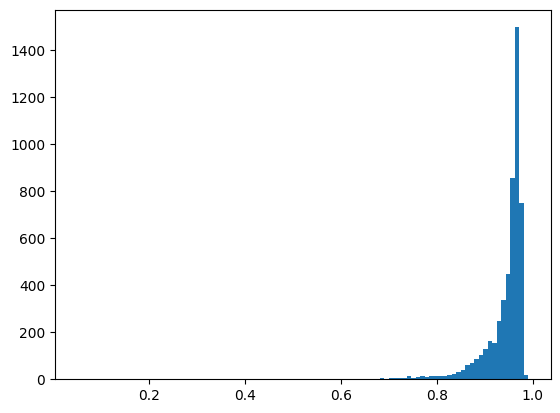

In [23]:
corr_log=exp_norm_log.corrwith(dee_norm_log, axis=0, drop=False, method='pearson')
plt.hist(corr_log, bins=100)

In [24]:
def corr_log_cell_type(typ):
    typ=gt.loc[gt['Cell_type'] == typ]
    typ_geo=typ['geo_accession'].values.tolist()
    exp_typ=exp_norm_log.loc[:, exp_norm_log.columns.intersection(typ_geo)]
    dee_typ=dee_norm_log.loc[:, dee_norm_log.columns.intersection(typ_geo)]
    corr_typ=exp_typ.corrwith(dee_typ, axis=0, drop=False, method='pearson')
    return plt.hist(corr_typ, bins=100)
def corr_log_cell_class(cla):
    cl=gt.loc[gt['Classes'] == cla]
    cl_geo=cl['geo_accession'].values.tolist()
    exp_cl=exp_norm_log.loc[:, exp_norm_log.columns.intersection(cl_geo)]
    dee_cl=dee_norm_log.loc[:, dee_norm_log.columns.intersection(cl_geo)]
    corr_cl=exp_cl.corrwith(dee_cl, axis=0, drop=False, method='pearson')
    plt.hist(corr_cl, bins=100)
    return print(cla), plt.show()

splenic B cells


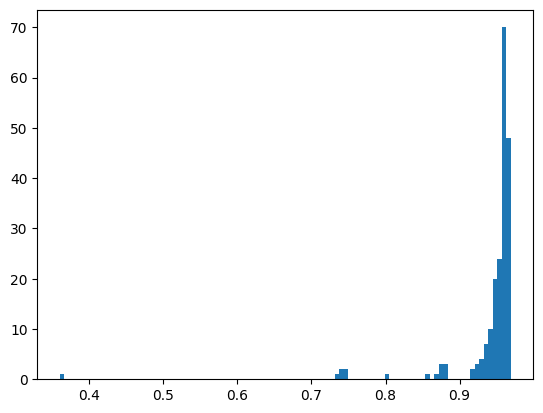

Germinal center B cells


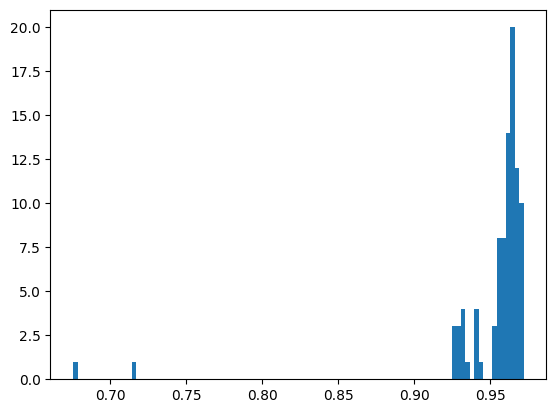

Marginal zone B cells


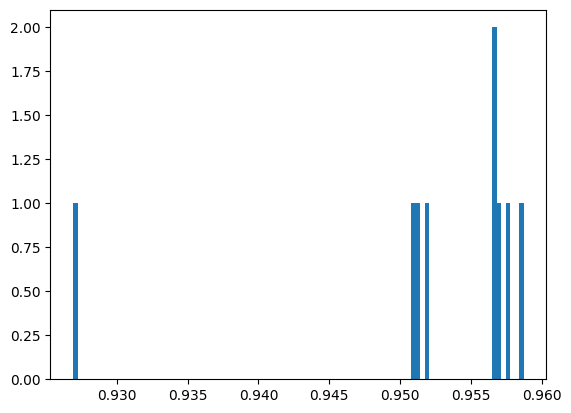

Follicular B cells


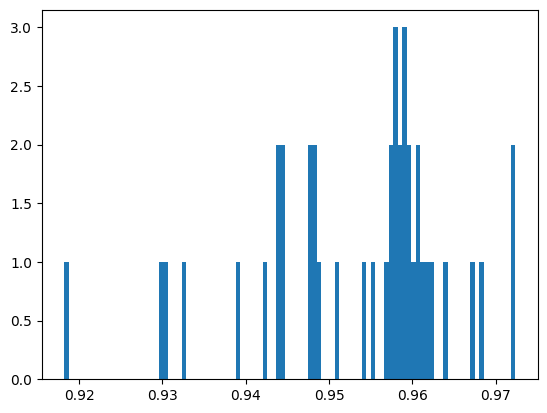

B220+ B cells


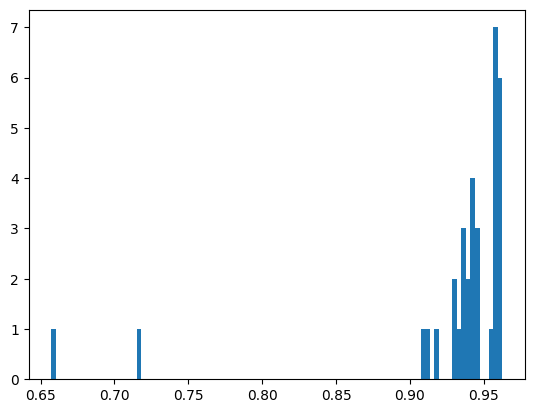

Primary B cells


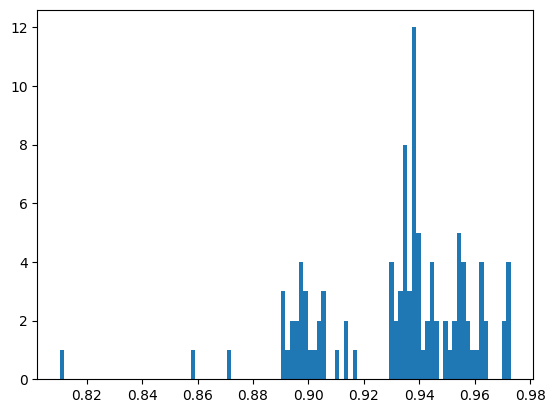

Immature B cells


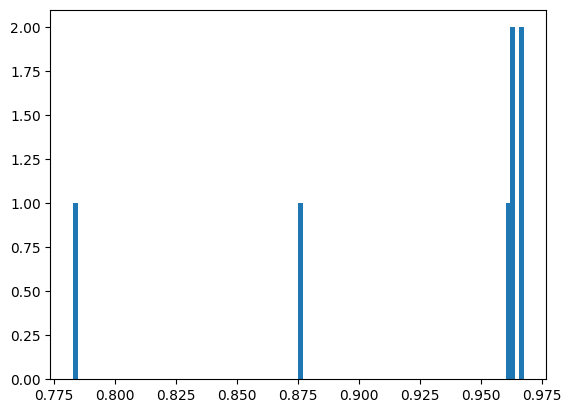

CH12 line


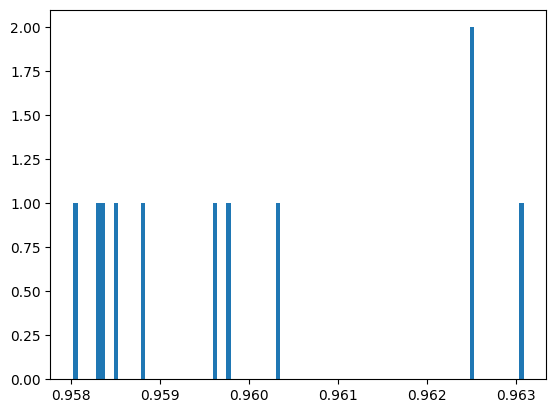

other B-cells


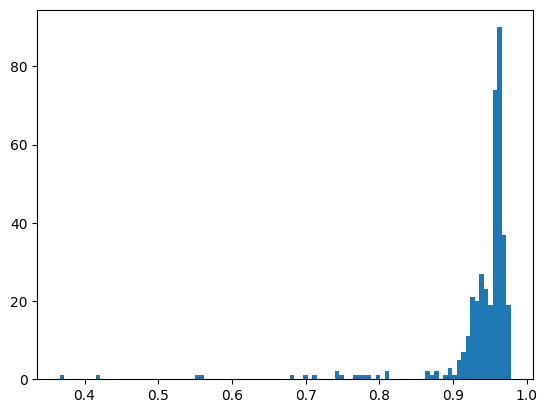

In [25]:
B_classes=['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','Immature B cells','CH12 line', 'other B-cells']
for i in B_classes:
    corr_log_cell_class(i)

CD8+ T cells


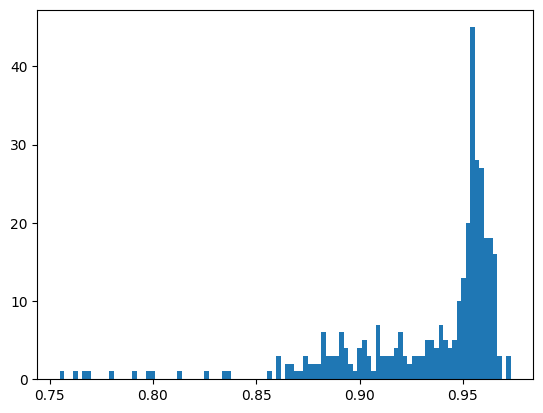

In [26]:
T_classes = ['CD8+ T cells']
for i in T_classes:
    corr_log_cell_class(i)

Bone Marrow Derived macrophages


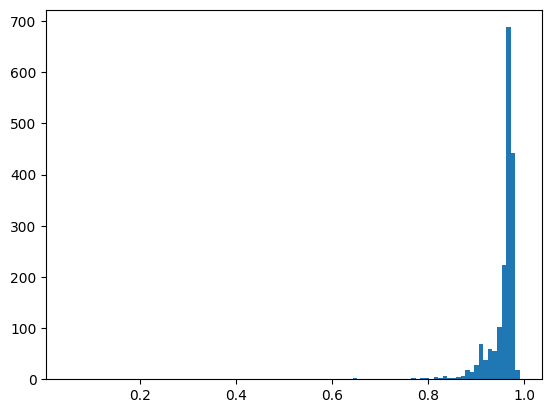

Peritoneal macrophage


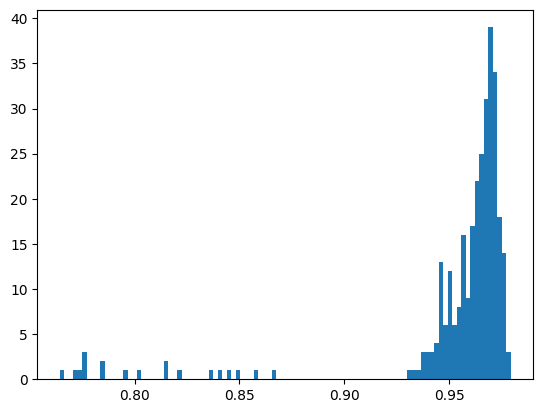

Alveolar macrophage


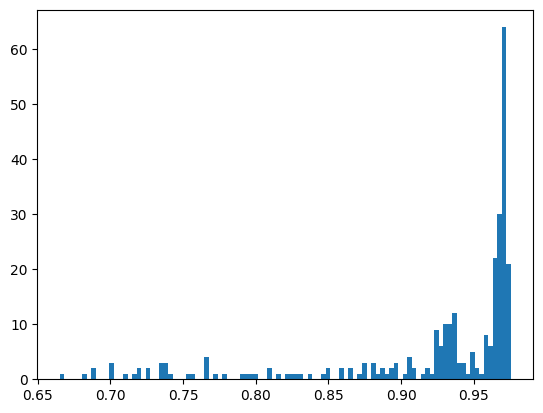

tumor macrophage


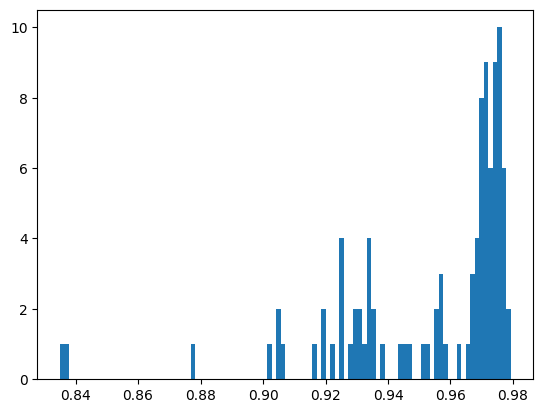

hepatic macrophages


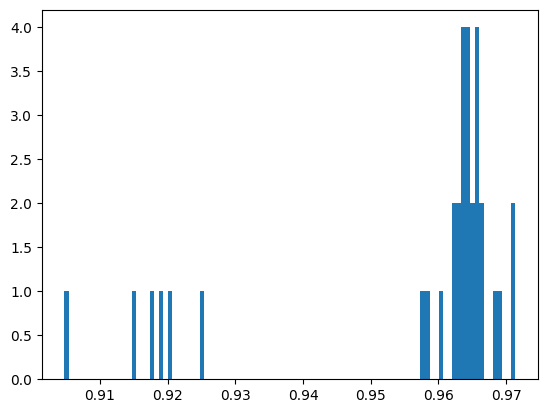

sciatic nerve macrophages


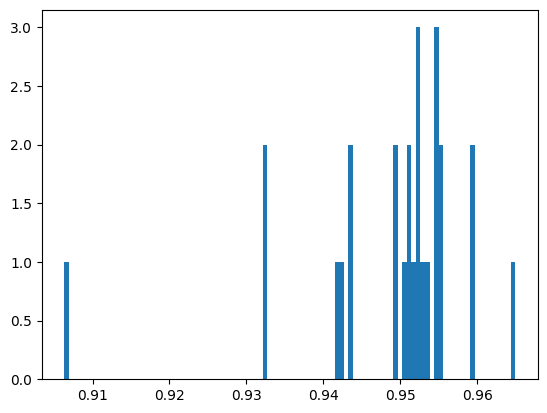

Phagocytic macrophages


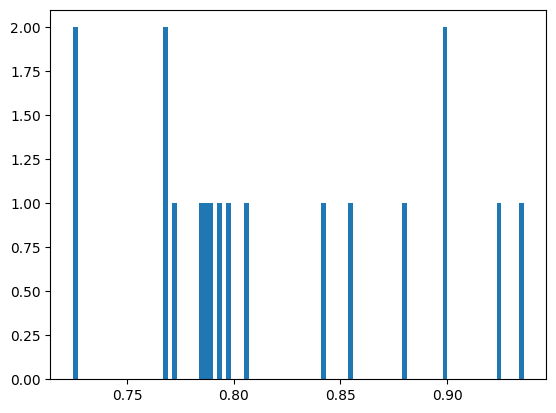

Peripheral macrophages


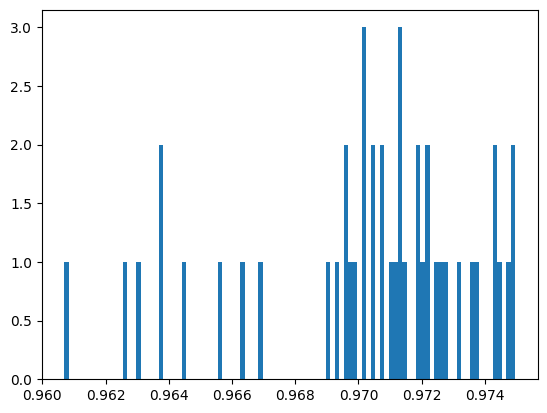

muscle macrophages


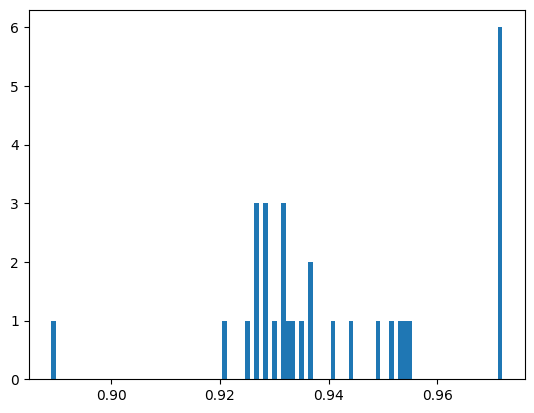

1 day after TBI macrophages


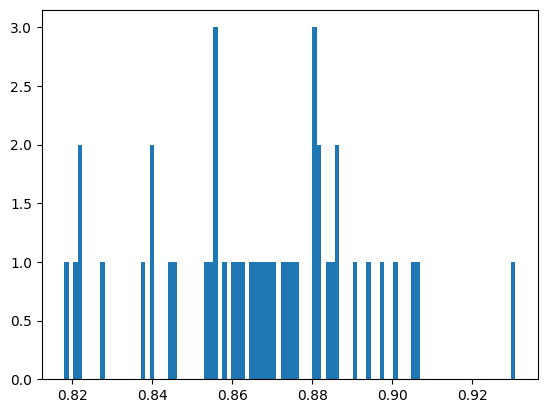

other macrophage


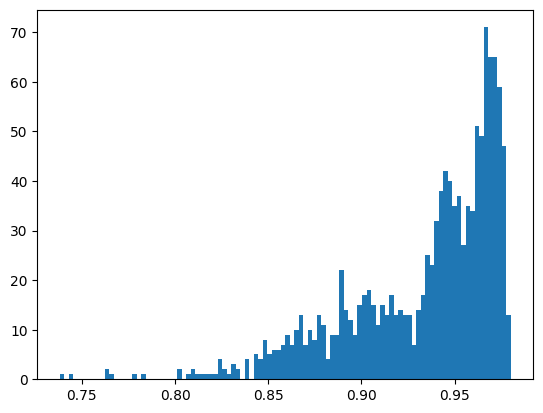

In [27]:
M_classes = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
for i in M_classes:
    corr_log_cell_class(i)

(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,
          0.,   1.,   2.,   0.,   0.,   1.,   3.,   4.,   0.,   0.,   1.,
          1.,   1.,   2.,   0.,   0.,   2.,   3.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   2.,   3.,   7.,   2.,   4.,  10.,   9.,
         11.,  10.,  17.,  27.,  55.,  64.,  58.,  63., 180., 221.,  82.,
         27.]),
 array([0.36038098, 0.36655894, 0.3727369 , 0.37891486, 0.38509281,
        0.39127077, 0.39744873, 0.40362669, 0.40980465, 0.41598261,
        0.42216056, 0.42833852, 0.43451648, 0.44069444, 0.4468724 ,
        0.45305036, 0.45922831, 0.46540627, 0.47158423, 0.47776219,
        0.48394015, 0.49011811, 0.49629606, 0.

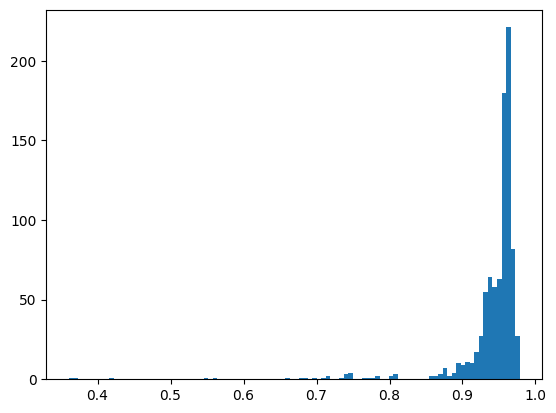

In [28]:
corr_log_cell_type('B_cells')

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  0.,  2.,  2.,
         1.,  1.,  3.,  2.,  2.,  2.,  6.,  3.,  3.,  3.,  6.,  4.,  2.,
         1.,  4.,  5.,  3.,  1.,  7.,  3.,  3.,  3.,  4.,  6.,  3.,  2.,
         3.,  3.,  3.,  5.,  5.,  4.,  7.,  5.,  4.,  5., 10., 13., 20.,
        45., 28., 27., 18., 18., 16.,  3.,  0.,  3.]),
 array([0.75497117, 0.75715278, 0.7593344 , 0.76151602, 0.76369764,
        0.76587926, 0.76806088, 0.7702425 , 0.77242412, 0.77460574,
        0.77678736, 0.77896898, 0.7811506 , 0.78333222, 0.78551384,
        0.78769545, 0.78987707, 0.79205869, 0.79424031, 0.79642193,
        0.79860355, 0.80078517, 0.80296679, 0.80514841, 0.80733003,
        0.80951165, 0.81169327, 0.81387489, 0.8160565 , 0.81823812,
        0.82041974, 0.8226

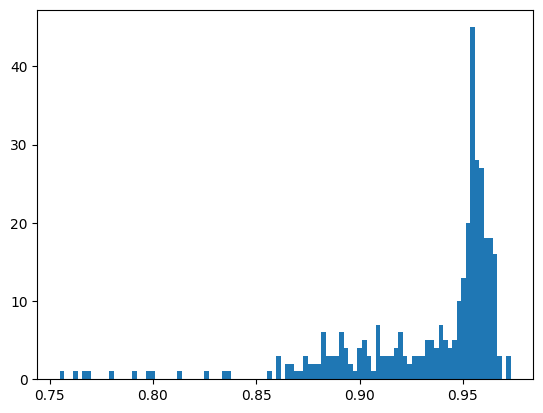

In [29]:
corr_log_cell_type('T_cells')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 6.000e+00,
        4.000e+00, 7.000e+00, 2.000e+00, 6.000e+00, 1.100e+01, 7.000e+00,
        1.000e+01, 1.000e+01, 9.000e+0

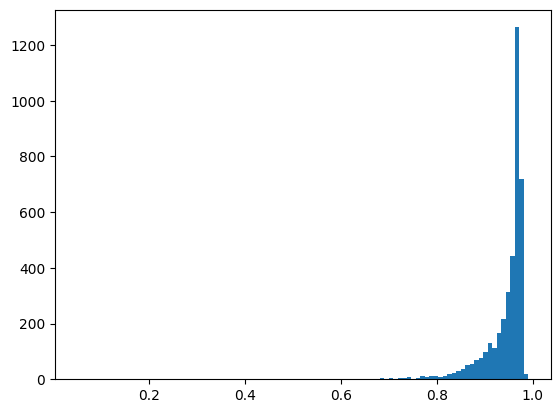

In [30]:
corr_log_cell_type('macrophage')

In [31]:
dee_norm_log=np.log(dee2+1)
exp_norm_log=np.log(exp2+1)

In [32]:
import qnorm # special module was installed for quantile normalization

In [33]:
dee_quant=qnorm.quantile_normalize(dee_norm_log, ncpus=4)
exp_quant=qnorm.quantile_normalize(exp_norm_log, ncpus=4)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 7.000e+00, 6.000e+00, 9.000e+00, 1.400e+01,
        2.300e+01, 2.300e+01, 4.400e+01, 5.100e+01, 4.400e+01, 4.500e+01,
        5.100e+01, 4.800e+01, 4.300e+0

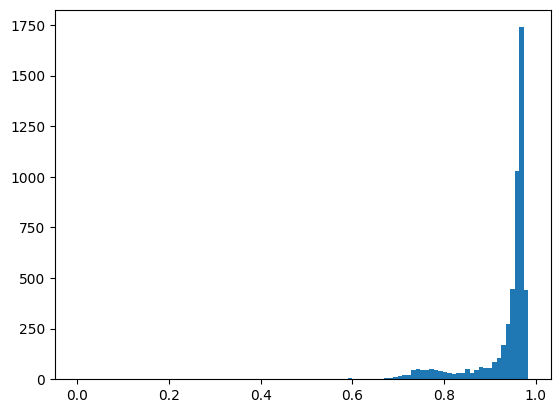

In [34]:
corr_quant=exp_quant.corrwith(dee_quant, axis=0, drop=False, method='pearson')
plt.hist(corr_quant, bins=100)

In [35]:
def corr_quant_cell_type(typ):
    typ=gt.loc[gt['Cell_type'] == typ]
    typ_geo=typ['geo_accession'].values.tolist()
    exp_typ=exp_quant.loc[:, exp_quant.columns.intersection(typ_geo)]
    dee_typ=dee_quant.loc[:, dee_quant.columns.intersection(typ_geo)]
    corr_typ=exp_typ.corrwith(dee_typ, axis=0, drop=False, method='pearson')
    return print(typ), plt.hist(corr_typ, bins=100)
def corr_quant_cell_class(cla):
    cl=gt.loc[gt['Classes'] == cla]
    cl_geo=cl['geo_accession'].values.tolist()
    exp_cl=exp_quant.loc[:, exp_quant.columns.intersection(cl_geo)]
    dee_cl=dee_quant.loc[:, dee_quant.columns.intersection(cl_geo)]
    corr_cl=exp_cl.corrwith(dee_cl, axis=0, drop=False, method='pearson')
    plt.hist(corr_cl, bins=100)
    return print(cla), plt.show()

splenic B cells


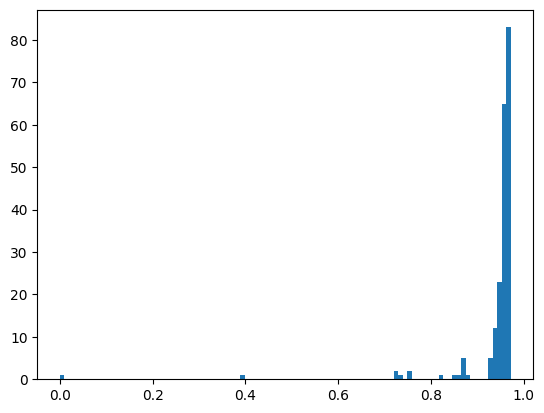

Germinal center B cells


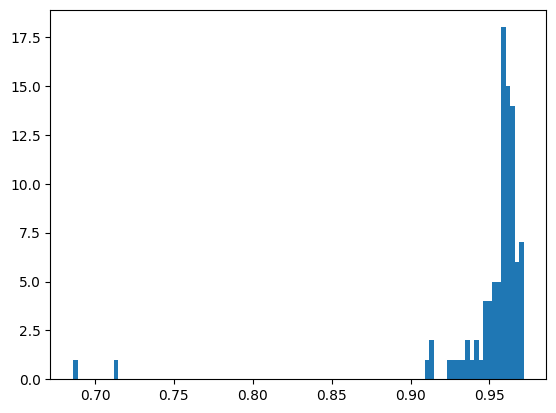

Marginal zone B cells


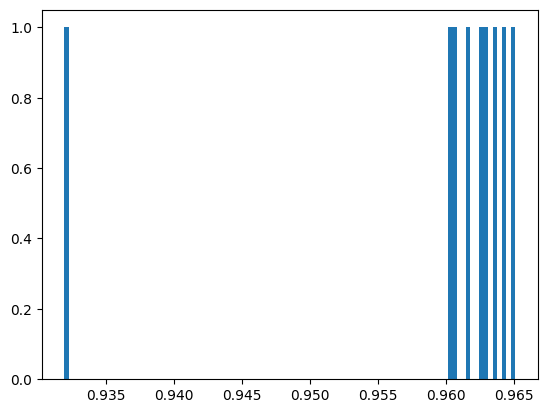

Follicular B cells


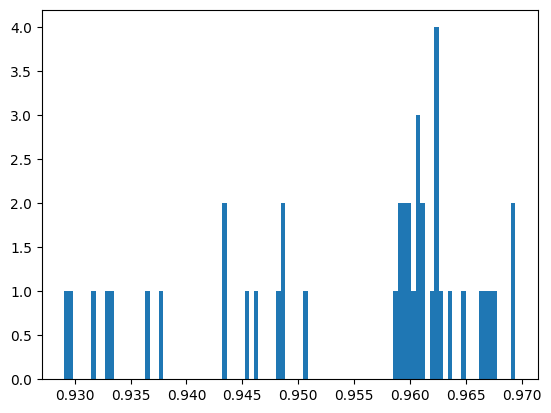

B220+ B cells


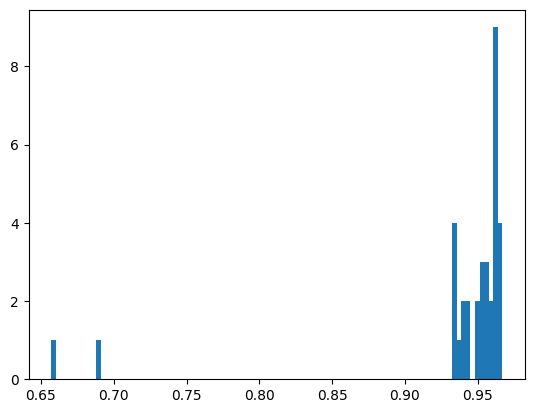

Primary B cells


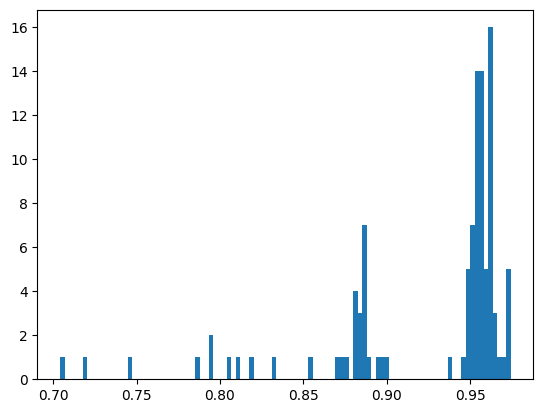

Immature B cells


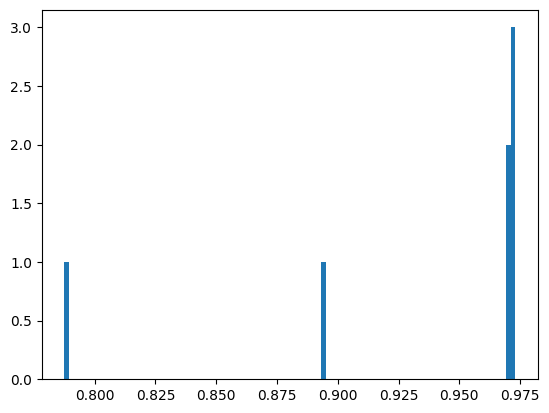

CH12 line


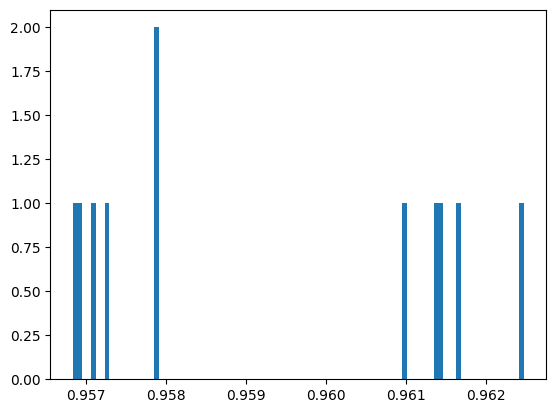

other B-cells


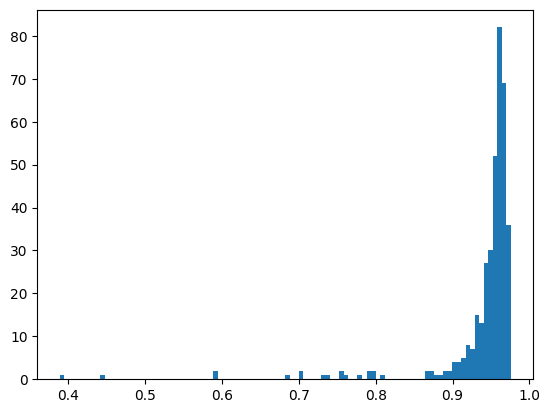

CD8+ T cells


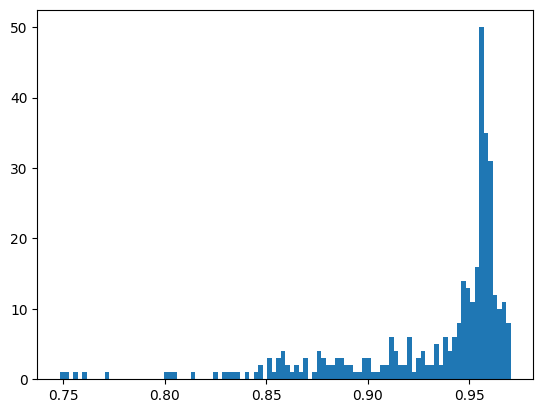

Bone Marrow Derived macrophages


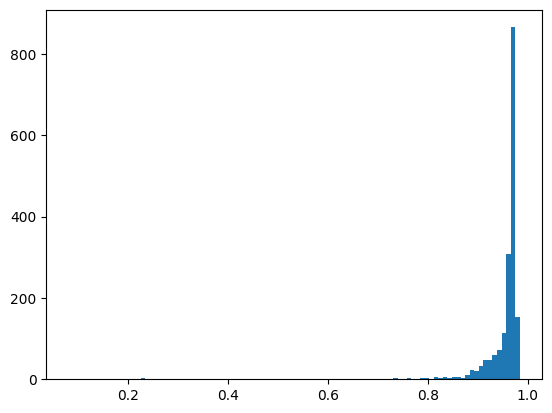

Peritoneal macrophage


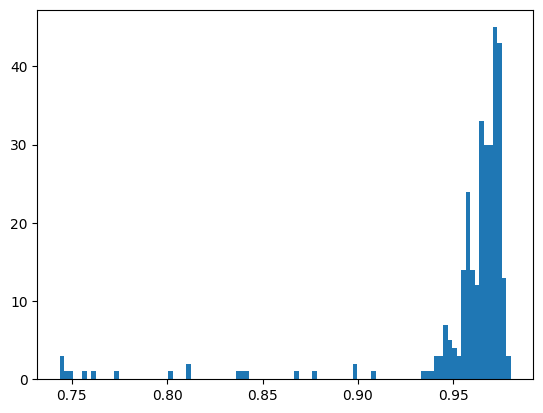

Alveolar macrophage


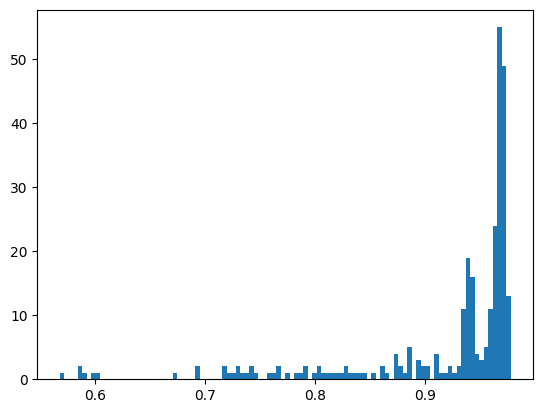

tumor macrophage


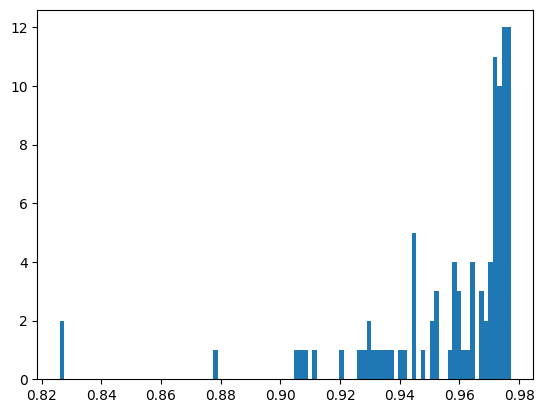

hepatic macrophages


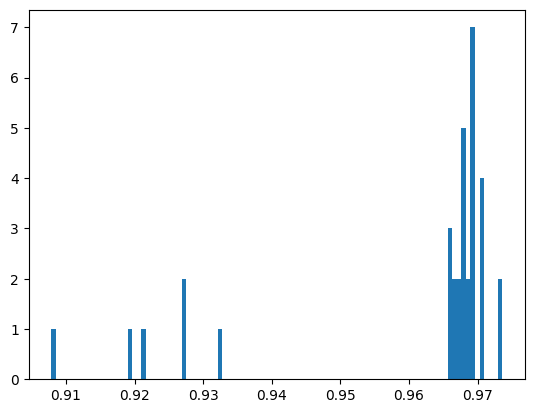

sciatic nerve macrophages


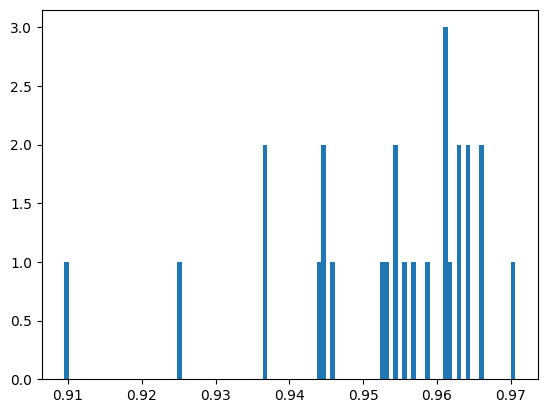

Phagocytic macrophages


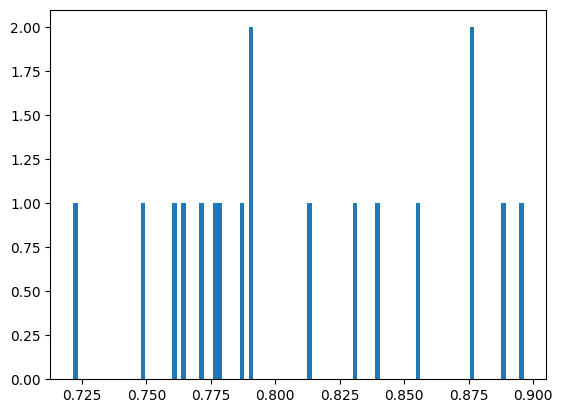

Peripheral macrophages


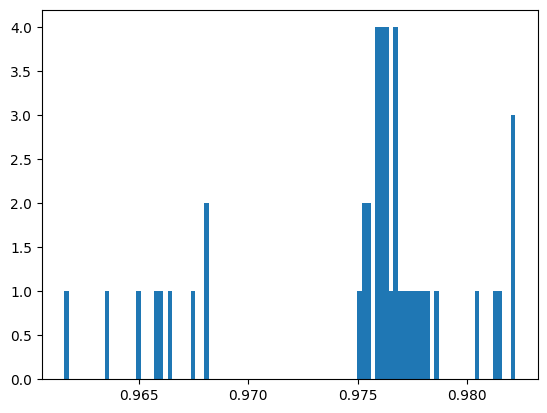

muscle macrophages


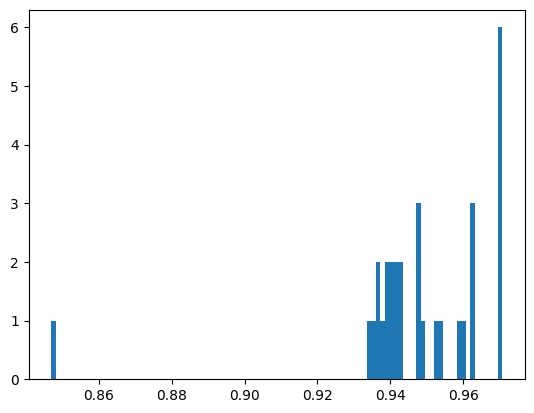

1 day after TBI macrophages


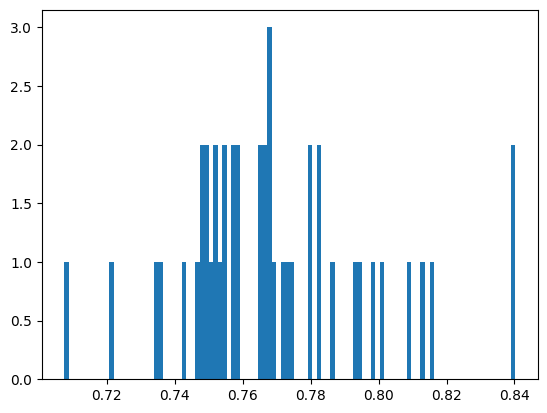

other macrophage


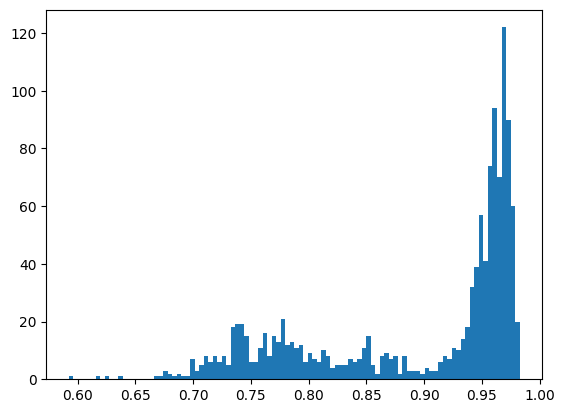

In [36]:
B_classes=['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','Immature B cells','CH12 line', 'other B-cells']
for i in B_classes:
    corr_quant_cell_class(i)
T_classes = ['CD8+ T cells']
for i in T_classes:
    corr_quant_cell_class(i)
M_classes = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
for i in M_classes:
    corr_quant_cell_class(i)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
3047          3047             0          19    GSM1356226    GPL13112   
3048          3048             1          76    GSM1119597    GPL13112   
3049          3049             2         106    GSM1533925    GPL13112   
3050          3050             3         240    GSM1808311    GPL13112   
3051          3051             4         274    GSM1823626    GPL13112   
...            ...           ...         ...           ...         ...   
9405          9405          6358      492513    GSM5550909    GPL19057   
9406          9406          6359      492636    GSM5558220    GPL21626   
9407          9407          6360      492637    GSM5558221    GPL21626   
9408          9408          6361      492638    GSM5558224    GPL21626   
9409          9409          6362      492639    GSM5558226    GPL21626   

       Cell_type                          Classes  \
3047  macrophage  Bone Marrow Derived macrophages   
3048 

(None,
 (array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
         0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
         1.00e+00, 1.00e+00, 3.00e+00, 2.00e+00, 0.00e+00, 1.00e+00,
         2.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 5.00e+00,
         6.00e+00, 4.00e+00, 1.10e+01, 1.40e+01, 1.90e+01, 2.00e+01,
         4.40e+01, 5.00e+01, 3.10e+01, 3.90e+01, 4.70e+01, 4.00e+01,
         3.80e+01, 3.10e+01, 2.20e+01, 2.40e+01, 2.20e+01, 2.30e+01,
         2.80e+01, 3.30e+01

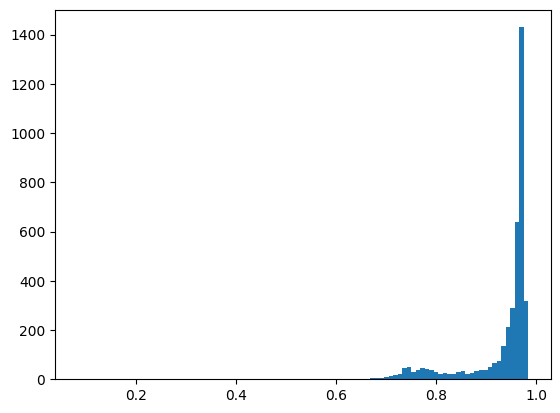

In [37]:
corr_quant_cell_type('macrophage')

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
0                0             0          28    GSM1849922    GPL13112   
1                1             1          38    GSM1897413    GPL13112   
2                2             2         334    GSM1849954    GPL13112   
3                3             3         341    GSM1229014    GPL13112   
4                4             4         570    GSM1234739    GPL13112   
...            ...           ...         ...           ...         ...   
1630          1630          1630      486647    GSM5471760    GPL24247   
1631          1631          1631      488893    GSM5481979    GPL21626   
1632          1632          1632      488894    GSM5481980    GPL21626   
1633          1633          1633      488895    GSM5481981    GPL21626   
1634          1634          1634      488896    GSM5481982    GPL21626   

     Cell_type             Classes                source_name_ch1  
0      B_cells       other B-cells         

(None,
 (array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.,   3.,   0.,   3.,   2.,   3.,   2.,   1.,
           5.,   0.,   1.,   2.,   6.,   1.,   2.,   2.,   1.,   0.,   2.,
           5.,  10.,  15.,   6.,   7.,  12.,  14.,  49.,  61., 169., 319.,
         175.]),
  array([-8.70126780e-17,  9.75762582e-03,  1.95152516e-02,  2.92728775e-02,
          3.90305033e-02,  4.87881291e-02,  5.85457549e-02,  6.83033807e-02,
          7.80610065e-02,  8.78186324e-02,  9.75762582e-02,  1.07333884e-01,
          1.17091510e-01,  1.26849136e-01,  1.36606761e-01,  1.4636438

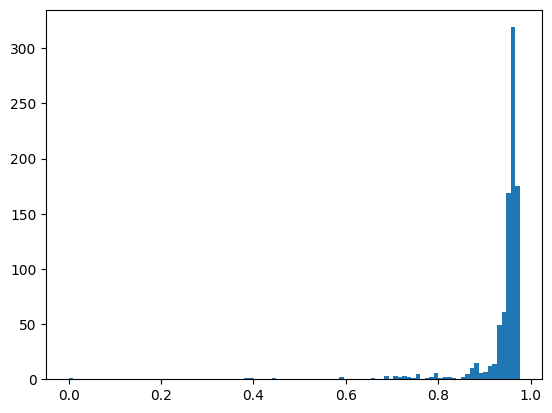

In [38]:
corr_quant_cell_type('B_cells')

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
1635          1635             0          64    GSM1262088    GPL13112   
1636          1636             1         183    GSM1511235    GPL13112   
1637          1637             2         279    GSM1713923    GPL13112   
1638          1638             3         397    GSM1703629    GPL13112   
1639          1639             4         773    GSM1543815    GPL13112   
...            ...           ...         ...           ...         ...   
3042          3042          1407      491895    GSM5534285    GPL19057   
3043          3043          1408      491896    GSM5534286    GPL19057   
3044          3044          1409      492642    GSM5560174    GPL19057   
3045          3045          1410      492643    GSM5560175    GPL19057   
3046          3046          1411      492644    GSM5560176    GPL19057   

     Cell_type       Classes                              source_name_ch1  
1635   T_cells  CD4+ T cells       

(None,
 (array([ 1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
          0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
          1.,  0.,  1.,  0.,  1.,  2.,  0.,  3.,  1.,  3.,  4.,  2.,  1.,
          2.,  1.,  3.,  0.,  1.,  4.,  3.,  2.,  2.,  3.,  3.,  2.,  2.,
          1.,  1.,  3.,  3.,  1.,  1.,  2.,  2.,  6.,  4.,  2.,  2.,  6.,
          1.,  3.,  4.,  2.,  2.,  5.,  2.,  6.,  4.,  6.,  8., 14., 13.,
         11., 16., 50., 35., 31., 12., 10., 11.,  8.]),
  array([0.74833041, 0.75055271, 0.75277502, 0.75499732, 0.75721963,
         0.75944193, 0.76166424, 0.76388654, 0.76610885, 0.76833115,
         0.77055346, 0.77277576, 0.77499806, 0.77722037, 0.77944267,
         0.78166498, 0.78388728, 0.78610959, 0.78833189, 0.7905542 ,
         0.7927765 , 0.7949988 , 0.79722111, 0.79944341, 0.80166572,
         0.80388802, 0.80611033, 0.80833263, 0.81055494, 0.81277724,
     

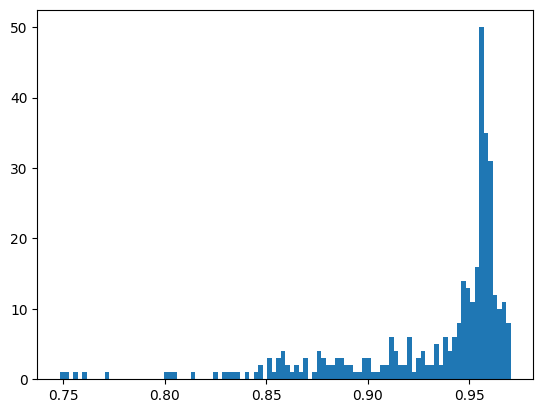

In [39]:
corr_quant_cell_type('T_cells')

In [40]:
gt=pd.read_csv('great_table2.csv')
dee = pd.read_csv('dee_cross.csv')
exp = pd.read_csv('exp_cross.csv')
dee2=dee.drop(columns = ['ensemble','symbol', 'Unnamed: 0'],axis = 1)
exp2=exp.drop(columns = ['ensemble','symbol', 'Unnamed: 0'],axis = 1)

In [41]:
exp_mean=exp2.mean(axis=1)
print(exp_mean.head(2))
print(exp2.head(2))

0    3721.113729
1       0.057926
dtype: float64
   GSM1026888  GSM1026889  GSM1026890  GSM1026891  GSM1026892  GSM1026893  \
0        5567        5857        4467        5325        6059        5579   
1           0           0           0           0           0           0   

   GSM1026894  GSM1026895  GSM1026896  GSM1026897  ...  GSM951560  GSM951561  \
0        4753        5581        4557        3708  ...        730       1378   
1           0           0           0           0  ...          0          0   

   GSM951562  GSM951563  GSM951564  GSM951565  GSM951566  GSM951567  \
0       1090       1446       2473       2214       2912       6433   
1          0          0          0          0          0          0   

   GSM951568  GSM988446  
0       3521          0  
1          0          4  

[2 rows x 5179 columns]


In [42]:
exp2.insert(0, 'mean', exp_mean)


In [43]:
exp_sorted=exp2.sort_values('mean',axis=0, ascending=False)
print(exp_sorted.head(10))

                mean  GSM1026888  GSM1026889  GSM1026890  GSM1026891  \
17518  238499.998455      485635      465667      422262      580519   
16925  180261.639313      107520       95913       88134       92264   
3270   178450.227457       65314       44384       51415       55724   
14163  175580.819270       98994       80482       89209       85969   
4448   172602.154277       25160       23085       24762       32951   
666    161655.645491       75355       61707       65796       80946   
10427  155560.687005      132325      118289      111300      153475   
9598   145901.511489        2002        1740        1627        1843   
1108   139822.102336       63243       49667       51446       59150   
7119   139820.384244      122268      125459       85172      119736   

       GSM1026892  GSM1026893  GSM1026894  GSM1026895  GSM1026896  ...  \
17518      639612      600192      519753      463154      369466  ...   
16925       85326      109415       83765      105613      

In [44]:
exp_sorted=exp_sorted.head(12000)

In [45]:
print(exp_sorted.head(10))

                mean  GSM1026888  GSM1026889  GSM1026890  GSM1026891  \
17518  238499.998455      485635      465667      422262      580519   
16925  180261.639313      107520       95913       88134       92264   
3270   178450.227457       65314       44384       51415       55724   
14163  175580.819270       98994       80482       89209       85969   
4448   172602.154277       25160       23085       24762       32951   
666    161655.645491       75355       61707       65796       80946   
10427  155560.687005      132325      118289      111300      153475   
9598   145901.511489        2002        1740        1627        1843   
1108   139822.102336       63243       49667       51446       59150   
7119   139820.384244      122268      125459       85172      119736   

       GSM1026892  GSM1026893  GSM1026894  GSM1026895  GSM1026896  ...  \
17518      639612      600192      519753      463154      369466  ...   
16925       85326      109415       83765      105613      

In [46]:
exp_sorted=exp_sorted.drop(columns = ['mean'],axis = 1)

In [47]:
index_list = exp_sorted.index.values.tolist ()
print(index_list[0:10])

[17518, 16925, 3270, 14163, 4448, 666, 10427, 9598, 1108, 7119]


In [48]:
dee_sorted=dee2.loc[index_list]
print(dee_sorted.head(5))
print(exp_sorted.head(5))

       GSM1026888  GSM1026889  GSM1026890  GSM1026891  GSM1026892  GSM1026893  \
17518      149644      143936      130495      180536      202028      186814   
16925       20650       18169       17322       18024       16806       21367   
3270        20959       14223       16444       17838       24869       20637   
14163        5294        4146        4834        4430        4577        4837   
4448         7921        7369        7821       10535       15085        9134   

       GSM1026894  GSM1026895  GSM1026896  GSM1026897  ...  GSM951560  \
17518      159857      142334      114470      130776  ...     184175   
16925       16317       20311       17154       18572  ...      26130   
3270        15810       13998       12504       15345  ...     227793   
14163        4384        4048        3554        5363  ...        242   
4448         6636        4998        6512        7321  ...     203197   

       GSM951561  GSM951562  GSM951563  GSM951564  GSM951565  GSM951566  \

In [49]:
dee_sorted_log=np.log(dee_sorted+1)
exp_sorted_log=np.log(exp_sorted+1)
dee_sorted_quant=qnorm.quantile_normalize(dee_sorted_log, ncpus=4)
exp_sorted_quant=qnorm.quantile_normalize(exp_sorted_log, ncpus=4)

In [50]:
dee_top=dee_sorted_quant.sort_index()
exp_top=exp_sorted_quant.sort_index()
print(exp_top.head(10))

    GSM1026888  GSM1026889  GSM1026890  GSM1026891  GSM1026892  GSM1026893  \
0     8.164578    8.332081    8.104576    8.093620    8.000064    8.047486   
2     2.252283    3.495260    2.169431    3.618968    3.814023    4.188534   
5     6.122865    6.016055    6.085885    5.699457    5.620644    5.917218   
6     6.404021    6.351309    5.790756    6.089667    6.116086    5.854333   
7     7.717821    7.566489    7.652207    7.334709    7.130849    7.218443   
8     5.825312    5.652158    5.699452    5.569363    5.640573    5.756116   
9     5.756169    5.979190    5.929738    5.882402    6.358457    6.057031   
16    5.554193    5.612005    5.464182    5.332682    5.283388    5.349055   
17    7.316666    7.265423    7.182821    7.273421    7.435822    7.276046   
18    7.458309    7.406810    7.473138    7.541771    7.612239    7.481507   

    GSM1026894  GSM1026895  GSM1026896  GSM1026897  ...  GSM951560  GSM951561  \
0     8.054438    8.303463    8.132865    7.868937  ...   6.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   1.,   2.,   1.,   0.,   1.,   2.,   0.,   0.,
          4.,   0.,   2.,   3.,   3.,   0.,   0.,   1.,   4.,   1.,   1.,
          3.,   3.,   7.,   4.,   4.,   3.,   8.,   1.,   4.,   7.,  12.,
          7.,   5.,   3.,   6.,   7.,   9.,   3.,   3.,   6.,   7.,   2.,
          3.,   3.,   2.,   5.,   8.,   5.,  13.,   7.,  12.,  19.,  40.,
         32.,  37.,  57.,  54.,  62.,  66.,  70.,  99.,  77., 106., 126.,
        129., 164., 194., 327., 501., 630., 791., 773., 522.,  81.,   0.,
         19.]),
 array([0.04683579, 0.05611433, 0.06539287, 0.07467141, 0.08394995,
        0.09322849, 0.10250703, 0.11178557, 0.12106411, 0.13034265,
        0.13962119, 0.14889973, 0.15817827, 0.16745681, 0.17673535,
        0.18601389, 0.19529243, 0.20457097, 0.21384951, 0.22312805,
        0.23240659, 0.24168513, 0.25096367, 0.

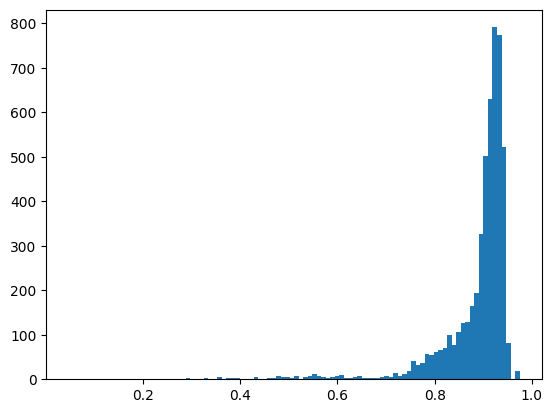

In [51]:
corr_top=exp_top.corrwith(dee_top, axis=0, drop=False, method='pearson')
plt.hist(corr_top, bins=100)

In [52]:
def corr_top_cell_type(typ):
    typ=gt.loc[gt['Cell_type'] == typ]
    typ_geo=typ['geo_accession'].values.tolist()
    exp_typ=exp_quant.loc[:, exp_quant.columns.intersection(typ_geo)]
    dee_typ=dee_quant.loc[:, dee_quant.columns.intersection(typ_geo)]
    corr_typ=exp_typ.corrwith(dee_typ, axis=0, drop=False, method='pearson')
    return print(typ), plt.hist(corr_typ, bins=100)
def corr_top_cell_class(cla):
    cl=gt.loc[gt['Classes'] == cla]
    cl_geo=cl['geo_accession'].values.tolist()
    exp_cl=exp_top.loc[:, exp_top.columns.intersection(cl_geo)]
    dee_cl=dee_top.loc[:, dee_top.columns.intersection(cl_geo)]
    corr_cl=exp_cl.corrwith(dee_cl, axis=0, drop=False, method='pearson')
    plt.hist(corr_cl, bins=100)
    return print(cla), plt.show()

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
1635          1635             0          64    GSM1262088    GPL13112   
1636          1636             1         183    GSM1511235    GPL13112   
1637          1637             2         279    GSM1713923    GPL13112   
1638          1638             3         397    GSM1703629    GPL13112   
1639          1639             4         773    GSM1543815    GPL13112   
...            ...           ...         ...           ...         ...   
3042          3042          1407      491895    GSM5534285    GPL19057   
3043          3043          1408      491896    GSM5534286    GPL19057   
3044          3044          1409      492642    GSM5560174    GPL19057   
3045          3045          1410      492643    GSM5560175    GPL19057   
3046          3046          1411      492644    GSM5560176    GPL19057   

     Cell_type       Classes                              source_name_ch1  
1635   T_cells  CD4+ T cells       

(None,
 (array([ 1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
          0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
          1.,  0.,  1.,  0.,  1.,  2.,  0.,  3.,  1.,  3.,  4.,  2.,  1.,
          2.,  1.,  3.,  0.,  1.,  4.,  3.,  2.,  2.,  3.,  3.,  2.,  2.,
          1.,  1.,  3.,  3.,  1.,  1.,  2.,  2.,  6.,  4.,  2.,  2.,  6.,
          1.,  3.,  4.,  2.,  2.,  5.,  2.,  6.,  4.,  6.,  8., 14., 13.,
         11., 16., 50., 35., 31., 12., 10., 11.,  8.]),
  array([0.74833041, 0.75055271, 0.75277502, 0.75499732, 0.75721963,
         0.75944193, 0.76166424, 0.76388654, 0.76610885, 0.76833115,
         0.77055346, 0.77277576, 0.77499806, 0.77722037, 0.77944267,
         0.78166498, 0.78388728, 0.78610959, 0.78833189, 0.7905542 ,
         0.7927765 , 0.7949988 , 0.79722111, 0.79944341, 0.80166572,
         0.80388802, 0.80611033, 0.80833263, 0.81055494, 0.81277724,
     

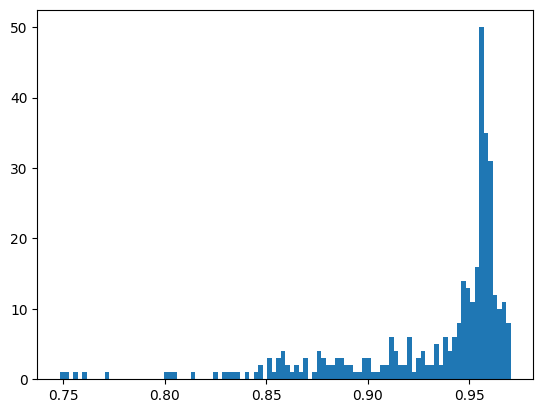

In [53]:
corr_top_cell_type('T_cells')

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
3047          3047             0          19    GSM1356226    GPL13112   
3048          3048             1          76    GSM1119597    GPL13112   
3049          3049             2         106    GSM1533925    GPL13112   
3050          3050             3         240    GSM1808311    GPL13112   
3051          3051             4         274    GSM1823626    GPL13112   
...            ...           ...         ...           ...         ...   
9405          9405          6358      492513    GSM5550909    GPL19057   
9406          9406          6359      492636    GSM5558220    GPL21626   
9407          9407          6360      492637    GSM5558221    GPL21626   
9408          9408          6361      492638    GSM5558224    GPL21626   
9409          9409          6362      492639    GSM5558226    GPL21626   

       Cell_type                          Classes  \
3047  macrophage  Bone Marrow Derived macrophages   
3048 

(None,
 (array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
         0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
         1.00e+00, 1.00e+00, 3.00e+00, 2.00e+00, 0.00e+00, 1.00e+00,
         2.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 5.00e+00,
         6.00e+00, 4.00e+00, 1.10e+01, 1.40e+01, 1.90e+01, 2.00e+01,
         4.40e+01, 5.00e+01, 3.10e+01, 3.90e+01, 4.70e+01, 4.00e+01,
         3.80e+01, 3.10e+01, 2.20e+01, 2.40e+01, 2.20e+01, 2.30e+01,
         2.80e+01, 3.30e+01

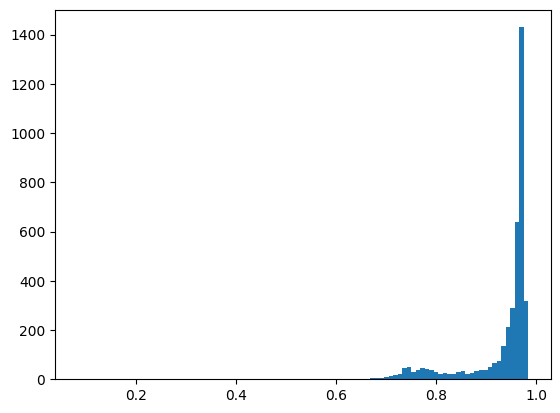

In [54]:

corr_top_cell_type('macrophage')

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
0                0             0          28    GSM1849922    GPL13112   
1                1             1          38    GSM1897413    GPL13112   
2                2             2         334    GSM1849954    GPL13112   
3                3             3         341    GSM1229014    GPL13112   
4                4             4         570    GSM1234739    GPL13112   
...            ...           ...         ...           ...         ...   
1630          1630          1630      486647    GSM5471760    GPL24247   
1631          1631          1631      488893    GSM5481979    GPL21626   
1632          1632          1632      488894    GSM5481980    GPL21626   
1633          1633          1633      488895    GSM5481981    GPL21626   
1634          1634          1634      488896    GSM5481982    GPL21626   

     Cell_type             Classes                source_name_ch1  
0      B_cells       other B-cells         

(None,
 (array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.,   3.,   0.,   3.,   2.,   3.,   2.,   1.,
           5.,   0.,   1.,   2.,   6.,   1.,   2.,   2.,   1.,   0.,   2.,
           5.,  10.,  15.,   6.,   7.,  12.,  14.,  49.,  61., 169., 319.,
         175.]),
  array([-8.70126780e-17,  9.75762582e-03,  1.95152516e-02,  2.92728775e-02,
          3.90305033e-02,  4.87881291e-02,  5.85457549e-02,  6.83033807e-02,
          7.80610065e-02,  8.78186324e-02,  9.75762582e-02,  1.07333884e-01,
          1.17091510e-01,  1.26849136e-01,  1.36606761e-01,  1.4636438

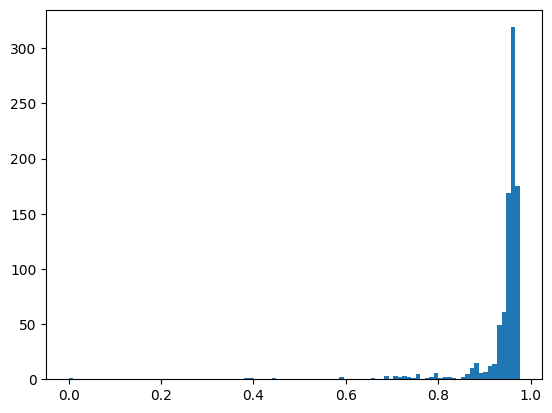

In [55]:
corr_top_cell_type('B_cells')

splenic B cells


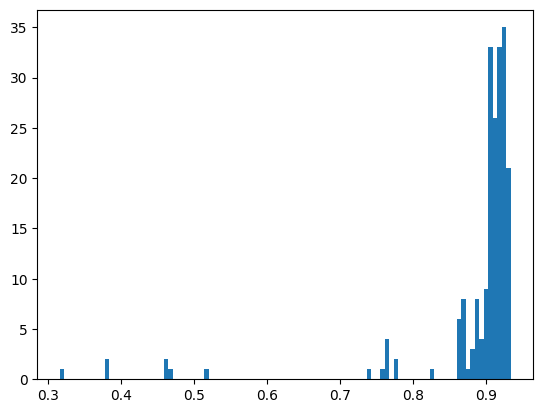

Germinal center B cells


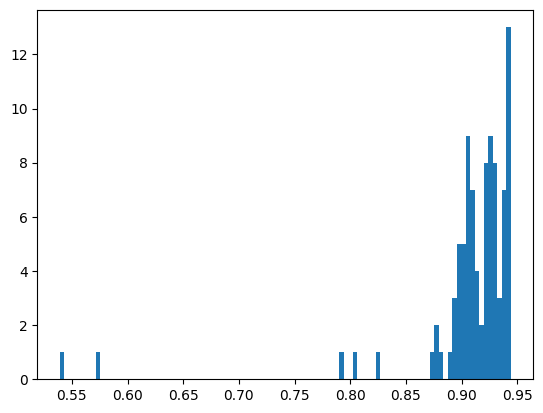

Marginal zone B cells


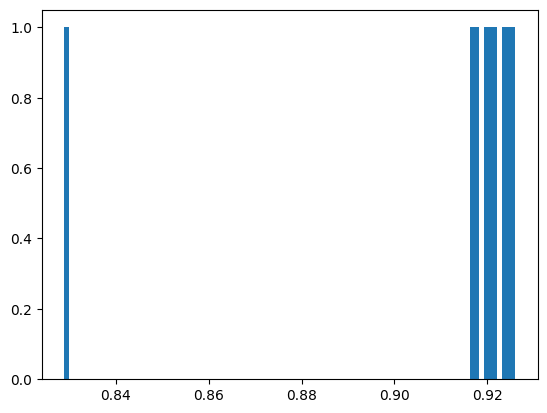

Follicular B cells


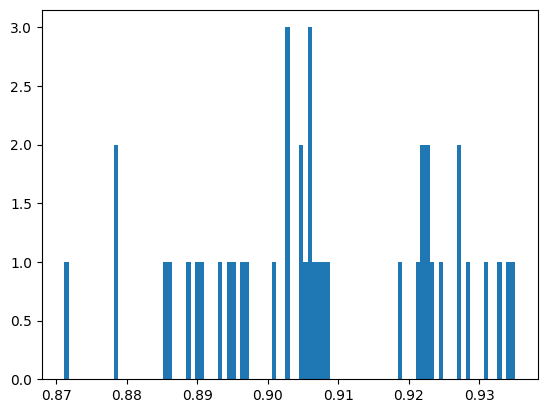

B220+ B cells


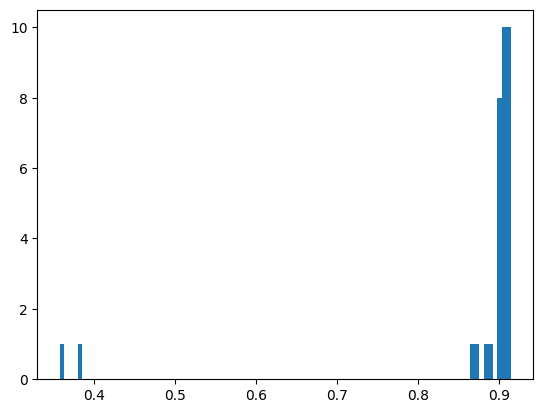

Primary B cells


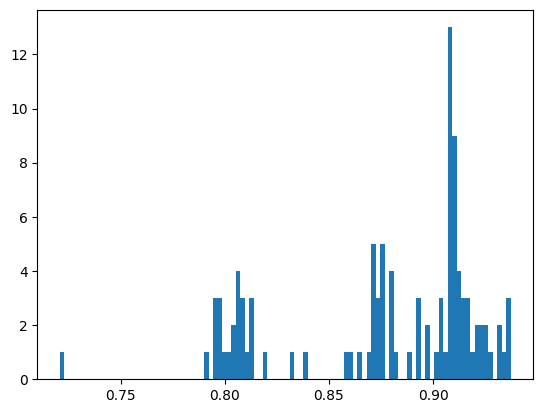

Immature B cells


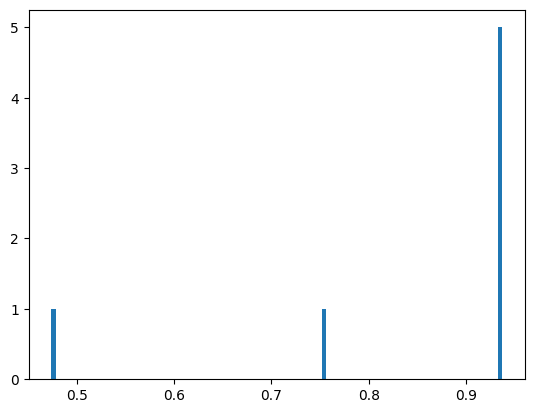

CH12 line


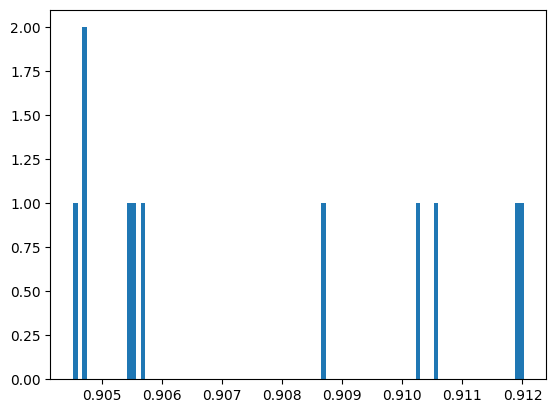

other B-cells


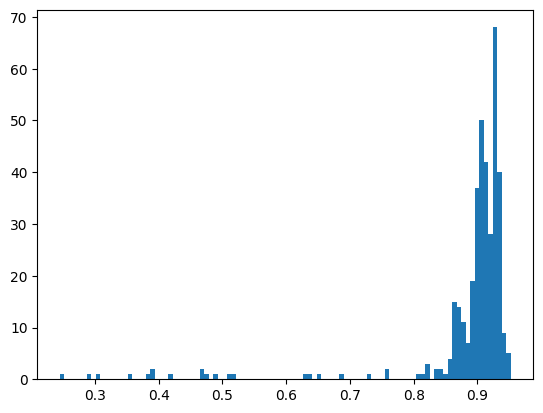

CD8+ T cells


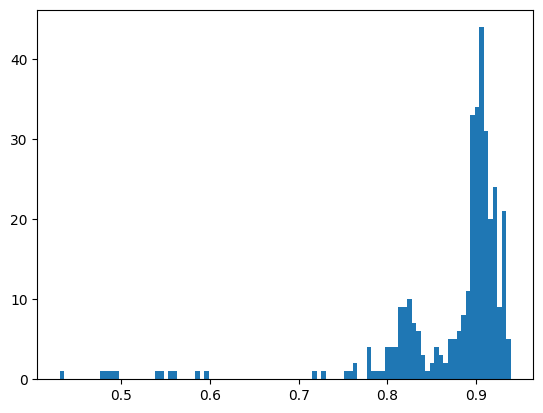

Bone Marrow Derived macrophages


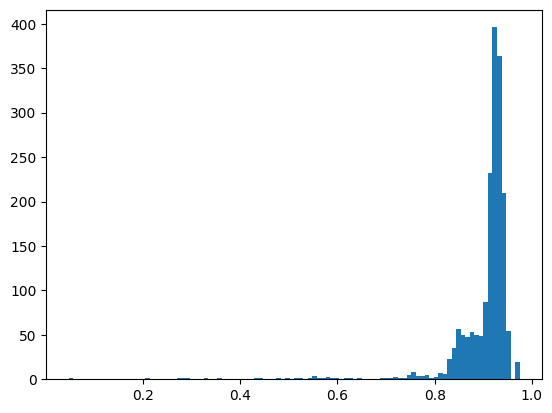

Peritoneal macrophage


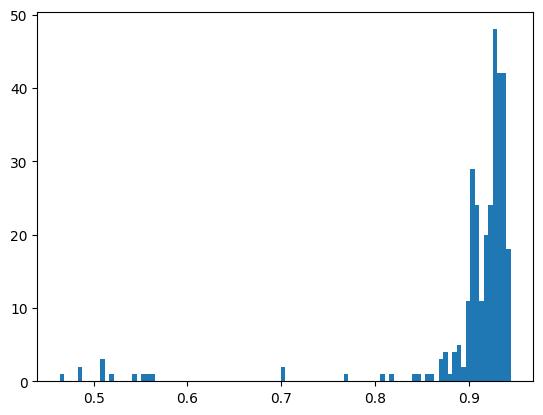

Alveolar macrophage


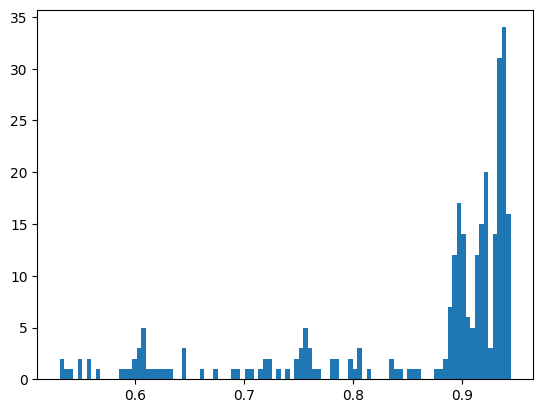

tumor macrophage


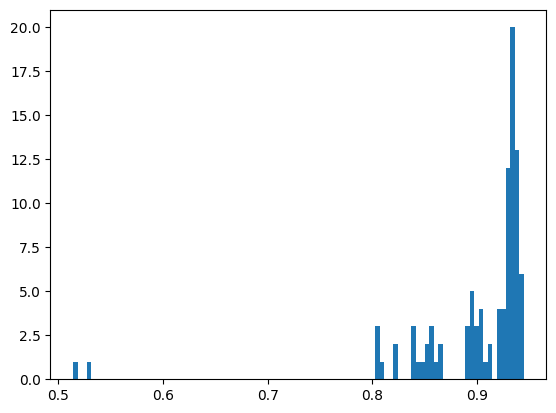

hepatic macrophages


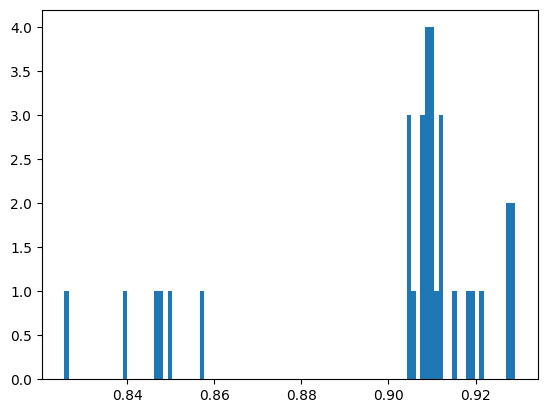

sciatic nerve macrophages


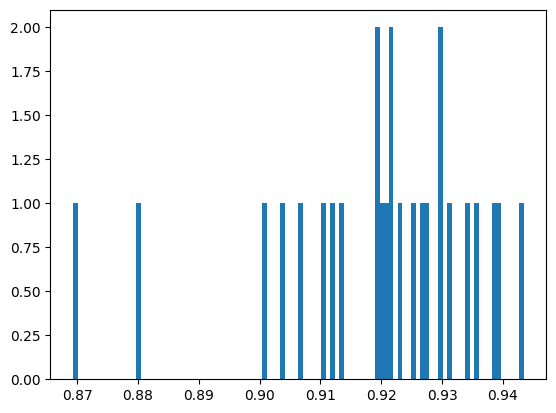

Phagocytic macrophages


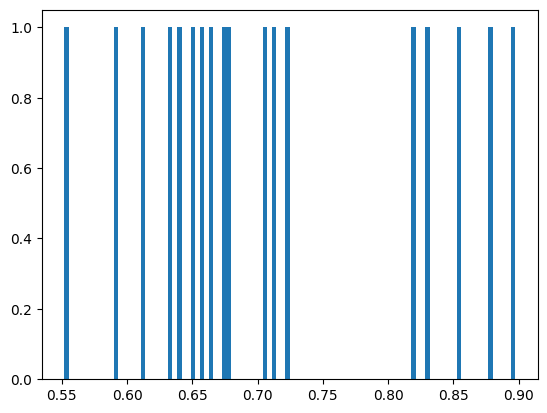

Peripheral macrophages


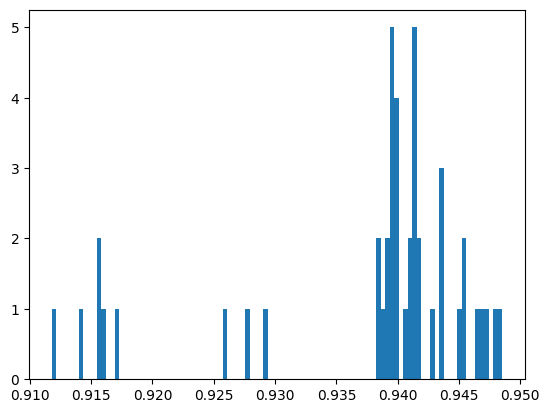

muscle macrophages


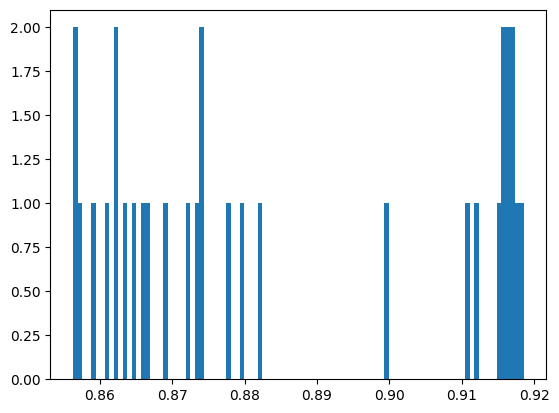

1 day after TBI macrophages


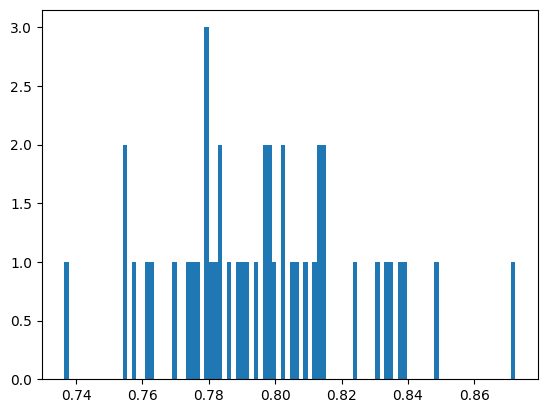

other macrophage


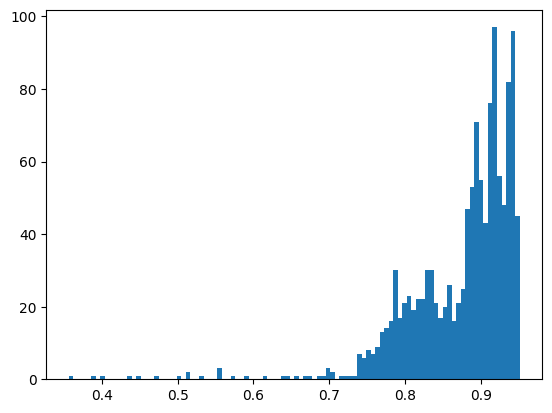

In [56]:
B_classes=['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','Immature B cells','CH12 line', 'other B-cells']
for i in B_classes:
    corr_top_cell_class(i)
T_classes = ['CD8+ T cells']
for i in T_classes:
    corr_top_cell_class(i)
M_classes = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
for i in M_classes:
    corr_top_cell_class(i)

In [57]:
exp_top.to_csv('exp_top.csv')
dee_top.to_csv('dee_top.csv')

In [89]:
dee_top = pd.read_csv('dee_top.csv')
dee_top=dee_top.drop(columns = ['Unnamed: 0'],axis = 1)
exp_top = pd.read_csv('exp_top.csv')
exp_top=exp_top.drop(columns = ['Unnamed: 0'],axis = 1)

In [90]:
gsm_list=exp_top.columns.values.tolist()

In [91]:
gsm_list[1:10]

['GSM1026889',
 'GSM1026890',
 'GSM1026891',
 'GSM1026892',
 'GSM1026893',
 'GSM1026894',
 'GSM1026895',
 'GSM1026896',
 'GSM1026897']

In [60]:
def t_sne_color (a, t):
    if a=='type':
        b=t
        gsm_list=b.columns.values.tolist()
        type_list=gt['Cell_type'].loc[gt['geo_accession'].isin(gsm_list)]
        b.columns=type_list
        b_transposed = b.T
        m = TSNE (learning_rate='auto')
        tsne_features = m.fit_transform (b_transposed)
        b_transposed['x'] = tsne_features [:, 0]
        b_transposed['y'] = tsne_features [:, 1]
        sns.scatterplot (x='x', y='y',hue=b_transposed.index, data=b_transposed, alpha=0.6)
        plt.legend(bbox_to_anchor=(1, 0.6))
        plt.show ()
        
    if a=='class':
        b=t
        gsm_list=b.columns.values.tolist()
        class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
        b.columns=class_list
        b_transposed = b.T
        m = TSNE (learning_rate='auto')
        tsne_features = m.fit_transform (b_transposed)
        b_transposed['x'] = tsne_features [:, 0]
        b_transposed['y'] = tsne_features [:, 1]
        sns.scatterplot (x='x', y='y',hue=b_transposed.index, data=b_transposed, alpha=0.6)
        plt.legend(bbox_to_anchor=(1, 0.6))
        plt.show ()       


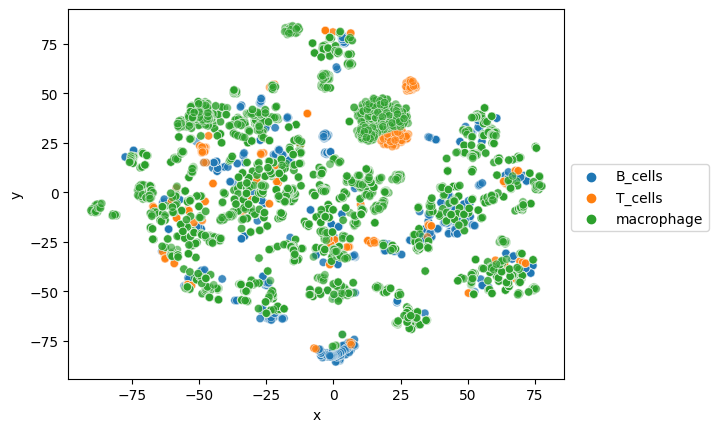

In [61]:
t_sne_color('type', dee_top)

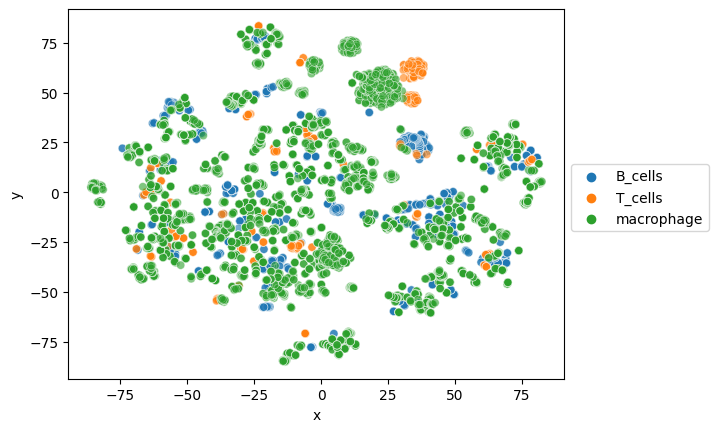

In [62]:
t_sne_color('type', exp_top)

In [92]:
def t_sne_color_small (a, t):
    b=t
    a=gt.loc[gt['Cell_type'] == a]
    a_geo=a['geo_accession'].values.tolist()
    b_typ=b.loc[:, b.columns.intersection(a_geo)]
    gsm_list=b_typ.columns.values.tolist()
    class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
    b_typ.columns=class_list
    b_typ_transposed = b_typ.T
    m = TSNE (learning_rate='auto')
    tsne_features = m.fit_transform (b_typ_transposed)
    b_typ_transposed['x'] = tsne_features [:, 0]
    b_typ_transposed['y'] = tsne_features [:, 1]
    sns.scatterplot (x='x', y='y',hue=b_typ_transposed.index, data=b_typ_transposed, alpha=0.6)
    plt.legend(bbox_to_anchor=(1, 0.6))
    plt.show ()  

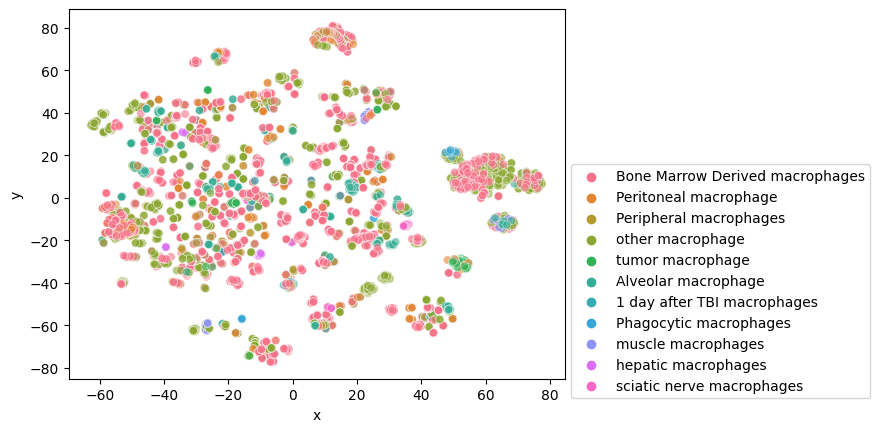

In [93]:
t_sne_color_small ('macrophage', exp_top)

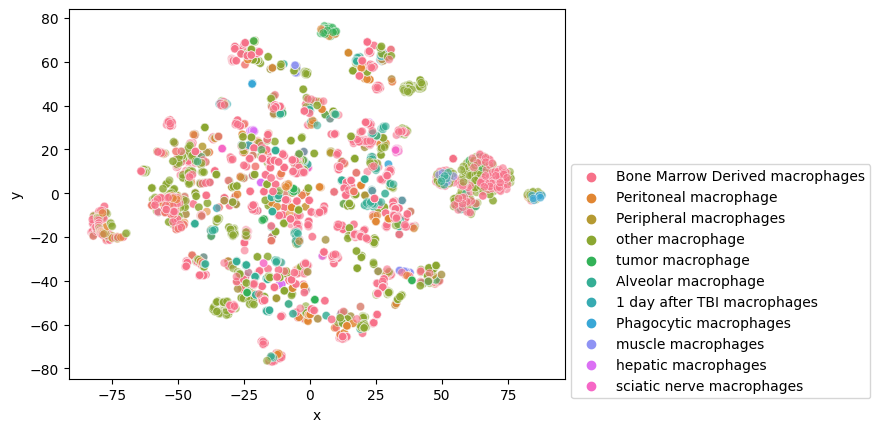

In [94]:
t_sne_color_small ('macrophage', dee_top)

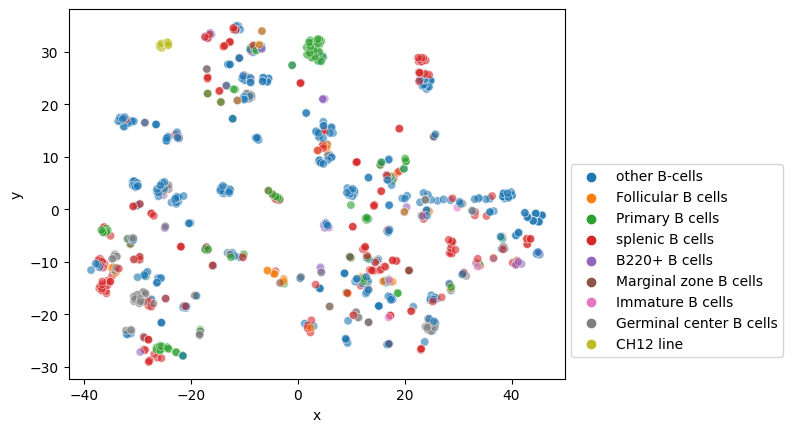

In [95]:
t_sne_color_small ('B_cells', exp_top)

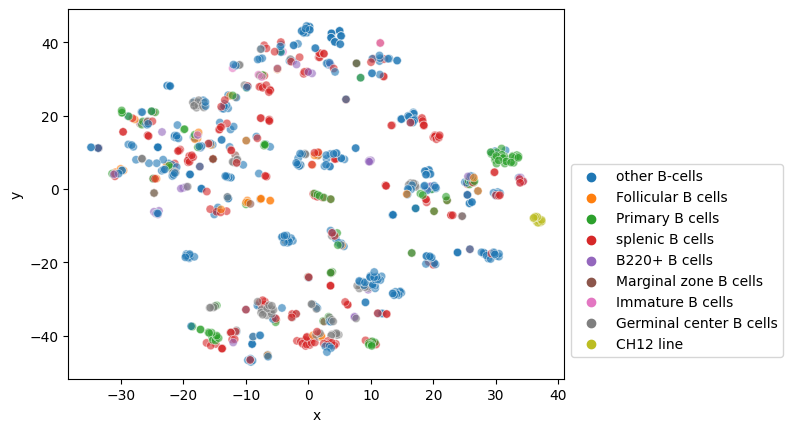

In [96]:
t_sne_color_small ('B_cells', dee_top)

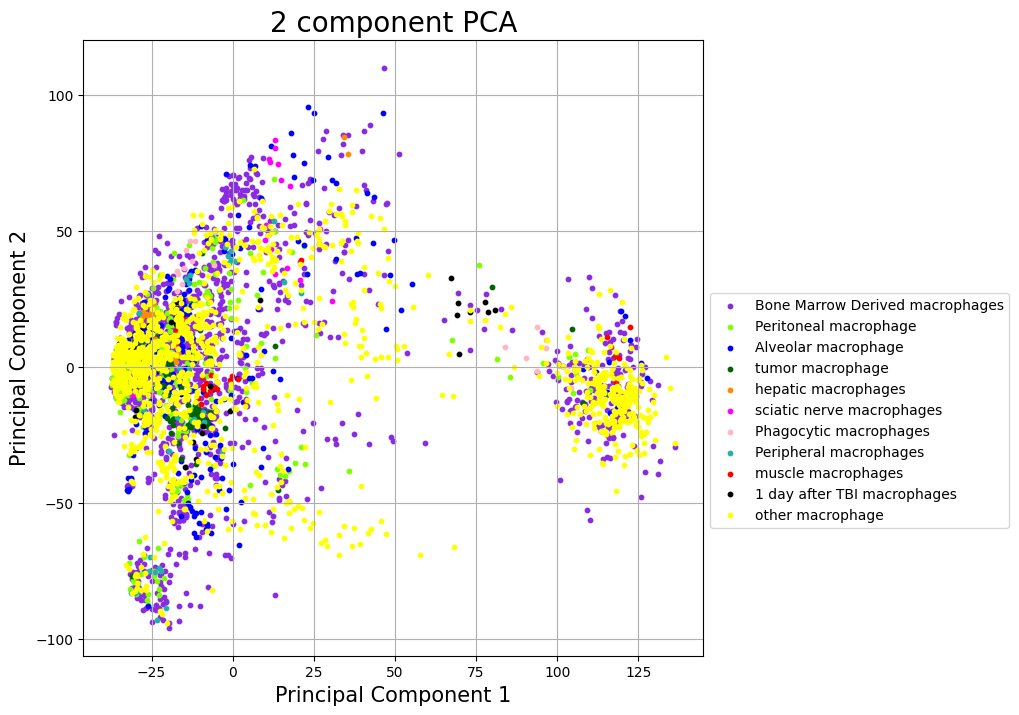

In [97]:
a=gt.loc[gt['Cell_type'] == 'macrophage']
a_geo=a['geo_accession'].values.tolist()
dee_typ=dee_top.loc[:, dee_top.columns.intersection(a_geo)]
gsm_list=dee_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
dee_typ.columns=class_list
dee_typ2=dee_typ.T
df=pd.DataFrame(dee_typ2.index)
from sklearn.preprocessing import StandardScaler
dee_st = StandardScaler().fit_transform(dee_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dee_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
colors = ['blueviolet', 'chartreuse', 'blue', 'darkgreen', 'darkorange', 'fuchsia', 'lightpink', 'lightseagreen', 'red', 'black', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets, bbox_to_anchor=(1, 0.6))
ax.grid()

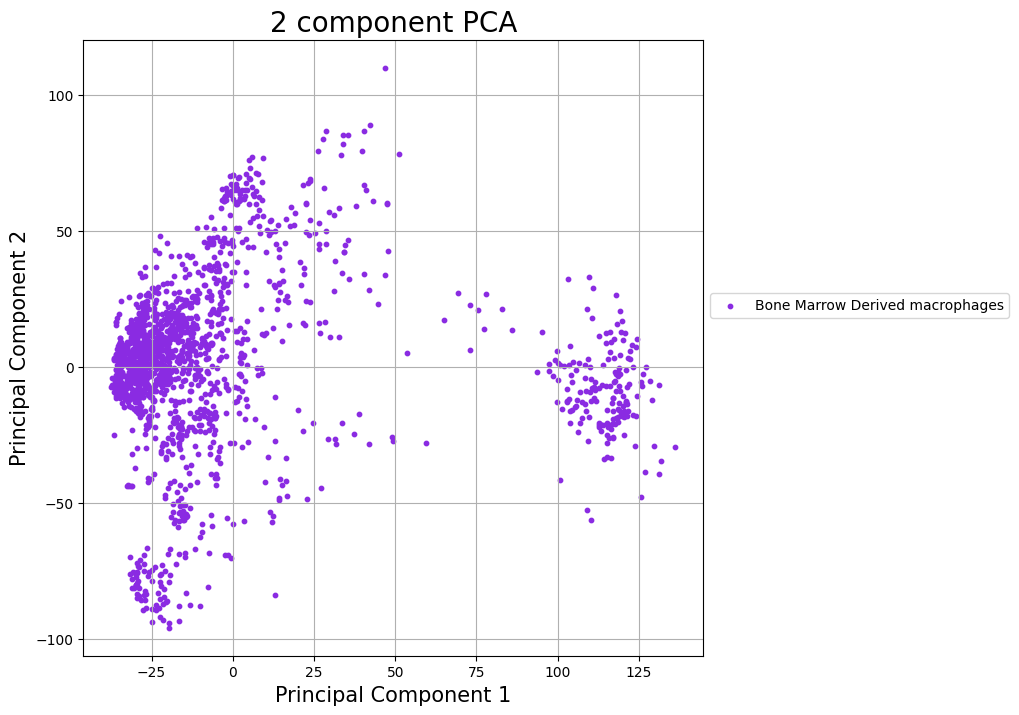

In [98]:
a=gt.loc[gt['Cell_type'] == 'macrophage']
a_geo=a['geo_accession'].values.tolist()
dee_typ=dee_top.loc[:, dee_top.columns.intersection(a_geo)]
gsm_list=dee_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
dee_typ.columns=class_list
dee_typ2=dee_typ.T
df=pd.DataFrame(dee_typ2.index)
from sklearn.preprocessing import StandardScaler
dee_st = StandardScaler().fit_transform(dee_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dee_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
colors = ['blueviolet']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets, bbox_to_anchor=(1, 0.6))
ax.grid()

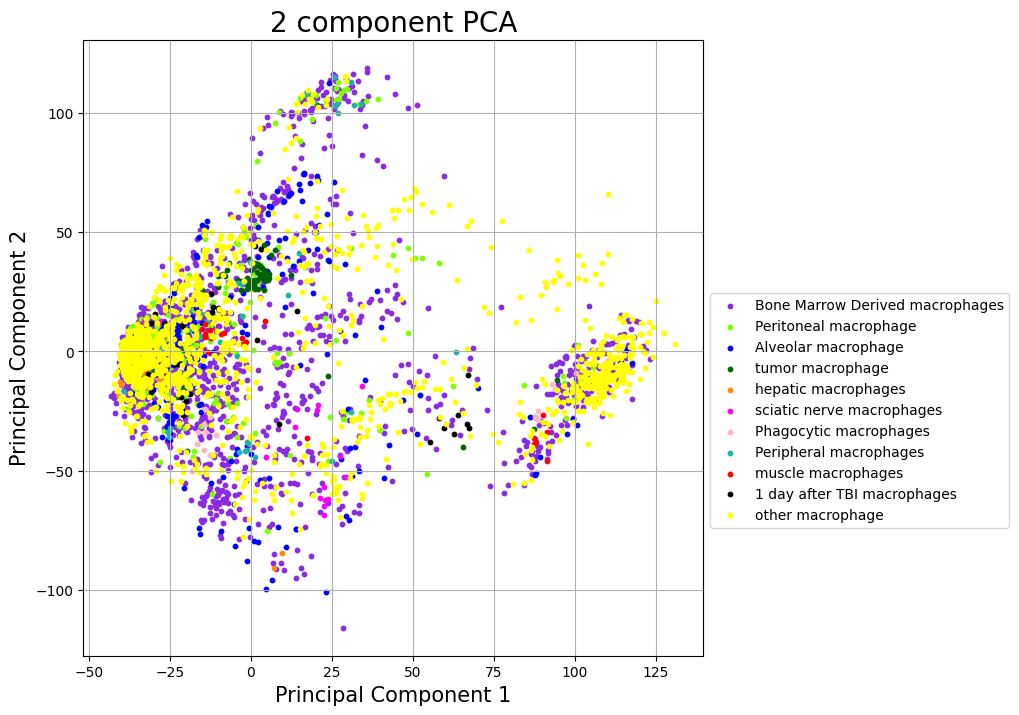

In [99]:

a=gt.loc[gt['Cell_type'] == 'macrophage']
a_geo=a['geo_accession'].values.tolist()
exp_typ=exp_top.loc[:, exp_top.columns.intersection(a_geo)]
gsm_list=exp_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
exp_typ.columns=class_list
exp_typ2=exp_typ.T
df=pd.DataFrame(exp_typ2.index)
from sklearn.preprocessing import StandardScaler
exp_st = StandardScaler().fit_transform(exp_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(exp_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
colors = ['blueviolet', 'chartreuse', 'blue', 'darkgreen', 'darkorange', 'fuchsia', 'lightpink', 'lightseagreen', 'red', 'black', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets, bbox_to_anchor=(1, 0.6))
ax.grid()

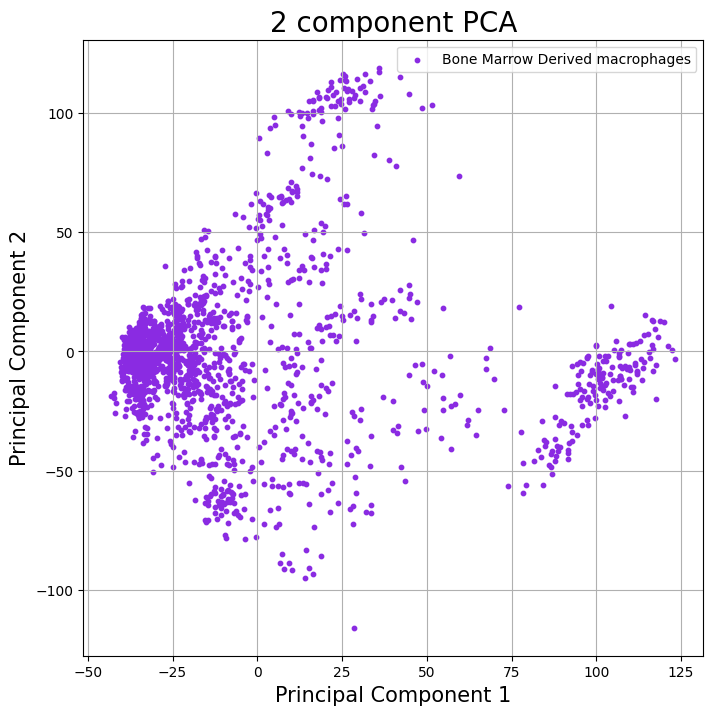

In [100]:
a=gt.loc[gt['Cell_type'] == 'macrophage']
a_geo=a['geo_accession'].values.tolist()
exp_typ=exp_top.loc[:, exp_top.columns.intersection(a_geo)]
gsm_list=exp_typ.columns.values.tolist()
class_list=gt['Classes'].loc[gt['geo_accession'].isin(gsm_list)]
exp_typ.columns=class_list
exp_typ2=exp_typ.T
df=pd.DataFrame(exp_typ2.index)
from sklearn.preprocessing import StandardScaler
exp_st = StandardScaler().fit_transform(exp_typ2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(exp_st)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Classes']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
colors = ['blueviolet']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()